## Top 5000 Spotify Data Sci
- @RodrigoLaraG
- 25/07

## Plans/Progress


- EDA
- define major parameters to rank/analyze data
    - `avg_rat`
    - `num_revs`
    - `num_rat`
- **Correlation c/ Music Descriptors**
- develop a ML algorithm to find/recognize patterns that help albuns be more popular/better reviewed, or find genre by descriptors
- some NLP to guess genres based on descriptors

### Ideas

- in-depth exploration of *1969 to 1975* and *1994 to 1998* periods
- in-depth exploration of `num_rat_log` < 1 & `avg_rat` > 3,9
- in-depth exploration of top XXX (i.e. top 500/ to p10%) most popular artists

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
dfs = pd.read_csv("Top5000.csv")

In [8]:
dfs.head(10)

Unnamed: 0                       ars_name           rel_date  \
0           0                      Radiohead       16 June 1997   
1           1                     Pink Floyd  12 September 1975   
2           2                   King Crimson    10 October 1969   
3           3                      Radiohead     3 October 2000   
4           4                 Kendrick Lamar      15 March 2015   
5           5            My Bloody Valentine    4 November 1991   
6           6                     Pink Floyd      23 March 1973   
7           7                    The Beatles  26 September 1969   
8           8  The Velvet Underground & Nico      12 March 1967   
9           9                    David Bowie       16 June 1972   

                                              gens  \
0                       Alternative Rock, Art Rock   
1                       Progressive Rock, Art Rock   
2                       Progressive Rock, Art Rock   
3          Art Rock, Experimental Rock, Electronic   
4  Conscious Hip Hop, West Coast Hip Hop, Jazz Rap   
5                              Shoegaze, Noise Pop   
6                       Art Rock, Progressive Rock   
7                                         Pop Rock   
8                      Art Rock, Experimental Rock   
9                              Glam Rock, Pop Rock   

                                               descs  avg_rat num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23  70,382   
1  melancholic, atmospheric, progressive, male vo...     4.29  48,662   
2  fantasy, epic, progressive, philosophical, com...     4.30  44,943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21  58,590   
4  political, conscious, poetic, protest, concept...     4.27  44,206   
5  noisy, ethereal, atmospheric, romantic, dense,...     4.24  49,887   
6  philosophical, atmospheric, introspective, exi...     4.20  57,622   
7  melodic, warm, male vocals, bittersweet, summe...     4.25  44,544   
8  drugs, sexual, raw, urban, noisy, nihilistic, ...     4.23  45,570   
9  science fiction, melodic, anthemic, concept al...     4.26  39,501   

   num_revs                                              album  acousticness  \
0      1531                                        OK Computer      0.135763   
1       983                                 Wish You Were Here      0.602800   
2       870                   In the Court of the Crimson King      0.297686   
3       734                                              Kid A      0.123219   
4       379                                To Pimp a Butterfly      0.322889   
5      1223                                           Loveless      0.185593   
6      1549                          The Dark Side of the Moon      0.390310   
7       961                                         Abbey Road      0.224964   
8       929                      The Velvet Underground & Nico      0.267295   
9       721  The Rise and Fall of Ziggy Stardust and the Sp...      0.178727   

   danceability    energy  instrumentalness  liveness   loudness  speechiness  \
0      0.288083  0.565917          0.161053  0.159375  -9.102417     0.056308   
1      0.373600  0.409800          0.363040  0.384940 -12.689400     0.039740   
2      0.340625  0.370475          0.327265  0.149138 -14.873125     0.043463   
3      0.601294  0.676706          0.000669  0.311412  -7.811941     0.268318   
4      0.590750  0.707625          0.000011  0.318419  -5.802062     0.294175   
5      0.227009  0.615364          0.787091  0.238555 -13.224727     0.049436   
6      0.383000  0.400450          0.595929  0.237680 -15.701900     0.058660   
7      0.518000  0.457176          0.122802  0.177718 -11.344412     0.047312   
8      0.428545  0.548818          0.329939  0.098436 -11.624364     0.054445   
9      0.502727  0.529091          0.003446  0.210082 -10.998545     0.041927   

        tempo   valence    duration_ms  time_signature  
0  115.450750  0.291733  268435.5000

In [9]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


In [10]:
dfs.describe()

Unnamed: 0      avg_rat     num_revs  acousticness  danceability  \
count  4402.000000  4402.000000  4402.000000  4.402000e+03   4402.000000   
mean   2200.500000     3.771320    76.538846  3.384089e-01      0.477338   
std    1270.892272     0.100606   112.977848  2.880880e-01      0.158556   
min       0.000000     3.520000     0.000000  6.609091e-07      0.074900   
25%    1100.250000     3.700000    16.000000  9.173208e-02      0.369511   
50%    2200.500000     3.750000    39.000000  2.613944e-01      0.473867   
75%    3300.750000     3.810000    91.000000  5.439500e-01      0.584472   
max    4401.000000     4.340000  1549.000000  9.960000e-01      0.946000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  4402.000000       4402.000000  4402.000000  4402.000000  4402.000000   
mean      0.575443          0.250817     0.201108   -10.674275     0.087147   
std       0.226569          0.286694     0.096184     5.197312     0.081774   
min       0.002360          0.000000     0.032100   -45.267000     0.026200   
25%       0.422866          0.009679     0.138433   -13.054771     0.041927   
50%       0.598767          0.126991     0.179018    -9.590507     0.055399   
75%       0.746233          0.423197     0.238470    -7.031358     0.094167   
max       1.000000          0.993000     0.937000     0.942625     0.944000   

             tempo      valence   duration_ms  time_signature  
count  4402.000000  4402.000000  4.402000e+03     4402.000000  
mean    119.290332     0.424103  2.849496e+05        3.855067  
std      14.933975     0.200978  1.957019e+05        0.226416  
min      60.011000     0.000010  3.976500e+04        1.000000  
25%     110.363377     0.272830  1.998519e+05        3.769231  
50%     119.175856     0.424937  2.432006e+05        3.916667  
75%     128.042923     0.577492  3.071986e+05        4.000000  
max     197.931000     0.990000  3.876277e+06        5.000000

### Dataset Columns

- **Album Descriptors**
    - `'Unnamed: 0'`: index
    - `'ars_name'`: artist name
    - `'rel_date'`: release date
    - `'gens'`: genres
    - `'descs'`: *descriptions of albuns*
    - `'avg_rat'`: average rating
    - `'num_rat'`: number os ratings
    - `'num_revs'`: number of reviews
    - `'album'`: album name
- **Music Descriptions**
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'`
    - `'speechiness'`
    - `'tempo'`
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`: duration in ms
    - `'time_signature'`: *possibly beats/bar?*


## Data Cleaning/Tidying/Feature Engineering

- **Album Descriptors**
    - `'Unnamed: 0'`: *DROP* [x]
    - `'ars_name'`: -
    - `'rel_date'`
        - to datetype [x]
    - `'gens'`
        - get main
        - get count
        - etc
    - `'descs'`
        - *missing values*
        - get main
        - get count
        - etc
    - `'avg_rat'`
    - `'num_rat'`
        - why object? correct data type [x]
        - make a log transform [x]
    - `'num_revs'`
        - - make a log transform [x]
    - `'album'`: album name
- **Music Descriptions**
        - get data format, etc [x]
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'` [-45, 1]
    - `'speechiness'`
    - `'tempo'` [60, 120]
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`
        - /1000 to get to s [x]
    - `'time_signature'`
        - get meaning of data

In [11]:
# drop index col
dfs.drop(columns=["Unnamed: 0"], inplace=True)

In [12]:
# rel_date to datetime format
dfs.rel_date = pd.to_datetime(dfs.rel_date, infer_datetime_format=True)

In [13]:
# for ease of analysis, new col rel_year
dfs["rel_year"] = dfs.rel_date.dt.year

In [14]:
# gets data to right type
dfs.num_rat = pd.to_numeric(dfs.num_rat.str.replace(",", ""), downcast="unsigned")

In [15]:
# gets data to seconds instead of millisconds
dfs.duration_ms = dfs.duration_ms*(0.001)
dfs.rename(columns={"duration_ms" : "duration_s"}, inplace=True)

**Log Transformer of `num_rat` and `num_revs`**

*The Distribution of both variables is extremely right skewed, therefore i've made a new columns that ios a LogTransformation of them, so i can more easily compare the distribution to other variables*

In [16]:
from sklearn.preprocessing import PowerTransformer
log_transformer1 = PowerTransformer()
log_transformer2 = PowerTransformer()

dfs["num_rat_log"] = log_transformer1.fit_transform(np.reshape(dfs.num_rat.values, (-1,1)))
dfs["num_revs_log"] = log_transformer2.fit_transform(np.reshape(dfs.num_revs.values, (-1,1)))

### Feature Engineering

- Quantiles of `num_rat` e `num_revs`
- Quantiles of `avg_rat`

In [17]:
# Quantile p/ num_rat
dfs["num_rat_qt"] = np.nan
dfs.num_rat_qt[dfs.num_rat_log >= dfs.num_rat_log.quantile(0.75)] = "75-100%"
dfs.num_rat_qt[(dfs.num_rat_log < dfs.num_rat_log.quantile(0.75))&(dfs.num_rat_log >= dfs.num_rat_log.quantile(0.5))] = "50-75%"
dfs.num_rat_qt[(dfs.num_rat_log < dfs.num_rat_log.quantile(0.5))&(dfs.num_rat_log >= dfs.num_rat_log.quantile(0.25))] = "25-50%"
dfs.num_rat_qt[dfs.num_rat_log < dfs.num_rat_log.quantile(0.25)] = "0-25%"

In [18]:
# Quantile p/ num_revs
dfs["num_rev_qt"] = np.nan
dfs.num_rev_qt[dfs.num_revs_log >= dfs.num_revs_log.quantile(0.75)] = "75-100%"
dfs.num_rev_qt[(dfs.num_revs_log < dfs.num_revs_log.quantile(0.75))&(dfs.num_revs_log >= dfs.num_revs_log.quantile(0.5))] = "50-75%"
dfs.num_rev_qt[(dfs.num_revs_log < dfs.num_revs_log.quantile(0.5))&(dfs.num_revs_log >= dfs.num_revs_log.quantile(0.25))] = "25-50%"
dfs.num_rev_qt[dfs.num_revs_log < dfs.num_revs_log.quantile(0.25)] = "0-25%"

In [19]:
# Quantile p/ avg_rat
dfs["avg_rat_qt"] = np.nan
dfs.avg_rat_qt[dfs.avg_rat >= dfs.avg_rat.quantile(0.75)] = "75-100%"
dfs.avg_rat_qt[(dfs.avg_rat < dfs.avg_rat.quantile(0.75))&(dfs.avg_rat >= dfs.avg_rat.quantile(0.5))] = "50-75%"
dfs.avg_rat_qt[(dfs.avg_rat < dfs.avg_rat.quantile(0.5))&(dfs.avg_rat >= dfs.avg_rat.quantile(0.25))] = "25-50%"
dfs.avg_rat_qt[dfs.avg_rat < dfs.avg_rat.quantile(0.25)] = "0-25%"

#### Genres

Get a `main-genre` and a `secondary-genre`

- Rock       
- Metal      
- *Music*      
- Pop        
- Folk       
- Jazz       
- Punk       
- Blues      
- Soul               
- Hip Hop        
- Country    
- Funk       
- *New*        
- Progressive
- Rap        
- Ambient    

In [20]:
def genre_splitter(string):
    # a function to split the list of genres into multiple columns

    array = string.split(", ")
    a = array[0]
    
    if len(array) > 1:
        b = array[1]
    else: b = ""
    
    if len(array) > 2:
        c = array[2]
    else: c = ""

    return [a, b, c]

In [21]:
dfs_gen = dfs.copy()
dfs_gen[["gen1", "gen2", "gen3"]] = dfs_gen.gens.apply(genre_splitter).tolist()

In [22]:
# get_dummies for main genres, retains secondary descriptor in gen1, gen2 and gen3
main_genres = ["Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", "Blues", "Soul", "Hip Hop", "Country"]

for gen in main_genres:

    temp1 = dfs_gen.gen1.apply(lambda x: 1 if gen in x else 0)
    temp2 = dfs_gen.gen2.apply(lambda x: 1 if gen in x else 0)
    temp3 = dfs_gen.gen3.apply(lambda x: 1 if gen in x else 0)
    
    dfs_gen[gen] = temp1 + temp2 + temp3

    dfs_gen.gen1[temp1 == 1] = dfs_gen.gen1.str.replace(gen, "")
    dfs_gen.gen2[temp2 == 1] = dfs_gen.gen2.str.replace(gen, "")
    dfs_gen.gen3[temp3 == 1] = dfs_gen.gen3.str.replace(gen, "")
    
# creates new column for those that don't fall into the main genres
dfs_gen["OtherGen"] = 0
dfs_gen["OtherGen"][dfs_gen[main_genres].sum(axis = 1) < 1] = 1

In [23]:
main_genres =["Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", "Blues", 
    "Soul", "Hip Hop", "Country", "OtherGen"] # adds OtherGen to main_genres index

In [24]:
dfs_gen_org = dfs_gen.copy() # creates a copy that will be used to set main genre latter

for gen in main_genres:
    dfs_gen[gen][dfs_gen[gen] >= 1] = 1 # sets genres w/ a value >1 to 1

In [25]:
dfs_gen[["album", "gen1", "gen2", "gen3", "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "OtherGen"]].head(20)

album          gen1  \
0                                         OK Computer  Alternative    
1                                  Wish You Were Here  Progressive    
2                    In the Court of the Crimson King  Progressive    
3                                               Kid A          Art    
4                                 To Pimp a Butterfly    Conscious    
5                                            Loveless      Shoegaze   
6                           The Dark Side of the Moon          Art    
7                                          Abbey Road                 
8                       The Velvet Underground & Nico          Art    
9   The Rise and Fall of Ziggy Stardust and the Sp...         Glam    
10                                           Revolver                 
11                                        Madvillainy     Abstract    
12                                    Remain in Light      New Wave   
13                The Black Saint and the Sinner Lady  Avant-Garde    
14                                        In Rainbows          Art    
15                                     A Love Supreme    Spiritual    
16                             good kid, m.A.A.d city   West Coast    
17                                           Paranoid        Heavy    
18                                       Kind of Blue        Modal    
19                                         Pet Sounds      Baroque    

             gen2        gen3  Rock  Metal  Pop  Folk  Jazz  Punk  Blues  \
0            Art                  1      0    0     0     0     0      0   
1            Art                  1      0    0     0     0     0      0   
2            Art                  1      0    0     0     0     0      0   
3   Experimental   Electronic     1      0    0     0     0     0      0   
4     West Coast          Rap     0      0    0     0     1     0      0   
5          Noise                  0      0    1     0     0     0      0   
6    Progressive                  1      0    0     0     0     0      0   
7                                 1      0    1     0     0     0      0   
8   Experimental                  1      0    0     0     0     0      0   
9                                 1      0    1     0     0     0      0   
10   Psychedelic                  1      0    1     0     0     0      0   
11                                0      0    0     0     0     0      0   
12          Post-                 0      0    0     0     0     1      0   
13   Third Stream                 0      0    0     0     1     0      0   
14   Alternative                  1      0    0     0     0     0      0   
15                                0      0    0     0     1     0      0   
16     Conscious                  0      0    0     0     0     0      0   
17          Hard                  1      1    0     0     0     0      0   
18          Cool                  0      0    0     0     1     0      0   
19                                0      0    1     0     0     0      0   

    Soul  Hip Hop  Country  OtherGen  
0      0        0        0         0  
1      0        0        0         0  
2      0        0        0         0  
3      0        0        0         0  
4      0        1        0         0  
5      0        0        0         0  
6      0        0        0         0  
7      0        0        0         0  
8      0        0        0         0  
9      0        0        0         0  
10     0        0        0         0  
11     0        1        0         0  
12     0        0        0         0  
13     0        0        0         0  
14     0        0        0         0  
15     0        0        0         0  
16     0        1        0         0  
17     0        0        0         0  
18     0        0        0         0  
19     0        0        0         0

In [26]:
dfs_gen_org[["album", "gen1", "gen2", "gen3", "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "OtherGen"]].head(20)

album          gen1  \
0                                         OK Computer  Alternative    
1                                  Wish You Were Here  Progressive    
2                    In the Court of the Crimson King  Progressive    
3                                               Kid A          Art    
4                                 To Pimp a Butterfly    Conscious    
5                                            Loveless      Shoegaze   
6                           The Dark Side of the Moon          Art    
7                                          Abbey Road                 
8                       The Velvet Underground & Nico          Art    
9   The Rise and Fall of Ziggy Stardust and the Sp...         Glam    
10                                           Revolver                 
11                                        Madvillainy     Abstract    
12                                    Remain in Light      New Wave   
13                The Black Saint and the Sinner Lady  Avant-Garde    
14                                        In Rainbows          Art    
15                                     A Love Supreme    Spiritual    
16                             good kid, m.A.A.d city   West Coast    
17                                           Paranoid        Heavy    
18                                       Kind of Blue        Modal    
19                                         Pet Sounds      Baroque    

             gen2        gen3  Rock  Metal  Pop  Folk  Jazz  Punk  Blues  \
0            Art                  2      0    0     0     0     0      0   
1            Art                  2      0    0     0     0     0      0   
2            Art                  2      0    0     0     0     0      0   
3   Experimental   Electronic     2      0    0     0     0     0      0   
4     West Coast          Rap     0      0    0     0     1     0      0   
5          Noise                  0      0    1     0     0     0      0   
6    Progressive                  2      0    0     0     0     0      0   
7                                 1      0    1     0     0     0      0   
8   Experimental                  2      0    0     0     0     0      0   
9                                 2      0    1     0     0     0      0   
10   Psychedelic                  1      0    2     0     0     0      0   
11                                0      0    0     0     0     0      0   
12          Post-                 0      0    0     0     0     1      0   
13   Third Stream                 0      0    0     0     1     0      0   
14   Alternative                  2      0    0     0     0     0      0   
15                                0      0    0     0     1     0      0   
16     Conscious                  0      0    0     0     0     0      0   
17          Hard                  1      1    0     0     0     0      0   
18          Cool                  0      0    0     0     2     0      0   
19                                0      0    1     0     0     0      0   

    Soul  Hip Hop  Country  OtherGen  
0      0        0        0         0  
1      0        0        0         0  
2      0        0        0         0  
3      0        0        0         0  
4      0        2        0         0  
5      0        0        0         0  
6      0        0        0         0  
7      0        0        0         0  
8      0        0        0         0  
9      0        0        0         0  
10     0        0        0         0  
11     0        1        0         0  
12     0        0        0         0  
13     0        0        0         0  
14     0        0        0         0  
15     0        0        0         0  
16     0        2        0         0  
17     0        0        0         0  
18     0        0        0         0  
19     0        0        0         0

In [27]:
for gen in main_genres:
    dfs_gen_org[gen][dfs_gen_org[gen] == 0] = np.nan

### Main Genre function

#### main genre by order on description

**`get_main_gen` function**

It goes trough every genre in the `.gens` column in order and check if they match to a `main_genre`, if they do they return it as the `main_gen`

In [28]:
def get_main_gen(string, main_genres):
    
    mg = "OtherGen" #standart is "OtherGen"
    #splits into array and removes symbols
    array = string.replace("-", " ").replace("/", " ").replace("Hip Hop", "HipHop").split(", ")
    
    # for every genre in de description
    for i in array:
        # if genre is composed of multiple keywords, uses the last
        if len(i.split(" ")) > 1: a = i.split(" ")[-1] 
        else: a = i
        
        if a == "HipHop": a = "Hip Hop" # undoes "HipHop" concatenation 
        
        # if it finds a match to a genre in main_genres it returns it
        if a in main_genres: 
            mg = a
            break
    return mg
    

In [29]:
dfs_gen["main_gen"] =  dfs_gen.gens.apply(lambda x: get_main_gen(x, main_genres))

## EDA of Variables

### `'ars_name'`

In [30]:
dfs.ars_name.value_counts().head(25)

Various Artists      18
Miles Davis          17
Tom Waits            13
John Williams        12
John Coltrane        12
Bob Dylan            11
The Beatles           9
Swans                 8
Opeth                 8
The Fall              8
Muddy Waters          8
Herbie Hancock        8
Iron Maiden           8
Thelonious Monk       8
Sonny Rollins         8
McCoy Tyner           8
Pink Floyd            8
Sonic Youth           7
Charles Mingus        7
Ennio Morricone       7
Johnny Cash           7
Joe Henderson         7
Van Morrison          7
Rush                  7
Bruce Springsteen     7
Name: ars_name, dtype: int64

In [31]:
artists = dfs.groupby(["ars_name"])

#### Top `artists`

In [32]:
# best rated artists on avg
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("avg_rat", ascending=False).head(15)

avg_rat  num_rat    num_revs  \
ars_name                                                                  
Mingus                                    4.340000  20251.0  365.000000   
The Velvet Underground & Nico             4.230000  45570.0  929.000000   
Wu-Tang Clan                              4.190000  27579.0  425.000000   
Slint                                     4.150000  32954.0  452.000000   
Television                                4.130000  25789.0  391.000000   
Godspeed You Black Emperor!               4.120000  26700.0  361.000000   
Genius/GZA                                4.110000  17308.0  329.000000   
DJ Shadow                                 4.110000  26775.0  410.000000   
Milton Nascimento & Lô Borges             4.100000   8084.0   88.000000   
Joy Division                              4.100000  34311.0  565.500000   
The Zombies                               4.080000  15652.0  419.000000   
The Jimi Hendrix Experience               4.076667  19330.0  418.666667   
Alice Coltrane featuring Pharoah Sanders  4.070000   8029.0   83.000000   
Fishmans                                  4.070000  14544.5  100.500000   
Steve Reich and Musicians                 4.060000   9251.0  142.000000   

                                             rel_year  
ars_name                                               
Mingus                                    1963.000000  
The Velvet Underground & Nico             1967.000000  
Wu-Tang Clan                              1993.000000  
Slint                                     1991.000000  
Television                                1977.000000  
Godspeed You Black Emperor!               1997.000000  
Genius/GZA                                1995.000000  
DJ Shadow                                 1996.000000  
Milton Nascimento & Lô Borges             1972.000000  
Joy Division                              1979.500000  
The Zombies                               1968.000000  
The Jimi Hendrix Experience               1967.333333  
Alice Coltrane featuring Pharoah Sanders  1971.000000  
Fishmans                                  1996.500000  
Steve Reich and Musicians                 1978.000000

In [33]:
# artists w/ largest mean rating of albuns
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("num_rat", ascending=False).head(15)

avg_rat       num_rat    num_revs     rel_year
ars_name                                                                      
Radiohead                      3.970000  46437.857143  732.142857  2002.714286
The Velvet Underground & Nico  4.230000  45570.000000  929.000000  1967.000000
Nirvana                        3.945000  38258.000000  765.500000  1992.000000
Kanye West                     3.804286  34580.428571  323.714286  2009.000000
Joy Division                   4.100000  34311.000000  565.500000  1979.500000
Pink Floyd                     3.935000  33985.250000  734.500000  1972.500000
Slint                          4.150000  32954.000000  452.000000  1991.000000
My Bloody Valentine            3.910000  32695.000000  726.000000  2002.000000
Neutral Milk Hotel             3.845000  30389.500000  558.000000  1997.000000
Kendrick Lamar                 3.850000  30233.000000  223.800000  2014.200000
The Beatles                    3.990000  30118.111111  703.777778  1970.777778
Kids See Ghosts                3.830000  29432.000000  215.000000  2018.000000
Wu-Tang Clan                   4.190000  27579.000000  425.000000  1993.000000
DJ Shadow                      4.110000  26775.000000  410.000000  1996.000000
Interpol                       3.950000  26724.000000  490.000000  2002.000000

In [34]:
# artists w/ largest amount of retings
artists[["avg_rat", "num_rat", "num_revs"]].sum().sort_values("num_rat", ascending=False).head(15)

avg_rat  num_rat  num_revs
ars_name                                  
Radiohead         27.79   325065      5125
Pink Floyd        31.48   271882      5876
The Beatles       35.91   271063      6334
Kanye West        26.63   242063      2266
David Bowie       28.11   170487      2944
Led Zeppelin      23.66   151243      3442
Kendrick Lamar    19.25   151165      1119
Bob Dylan         43.19   147597      3349
Miles Davis       66.34   129004      2221
Black Sabbath     27.68   128519      2565
King Crimson      27.62   127289      2317
Swans             30.97   112430      1302
Björk             19.48   106875      1132
Metallica         15.62   102572      2251
The Smiths        19.50   102196      1358

In [35]:
# artists w/ largest mean number of reviews albuns
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("num_revs", ascending=False).head(15)

avg_rat       num_rat    num_revs     rel_year
ars_name                                                                      
The Velvet Underground & Nico  4.230000  45570.000000  929.000000  1967.000000
Nirvana                        3.945000  38258.000000  765.500000  1992.000000
Pink Floyd                     3.935000  33985.250000  734.500000  1972.500000
Radiohead                      3.970000  46437.857143  732.142857  2002.714286
My Bloody Valentine            3.910000  32695.000000  726.000000  2002.000000
The Beatles                    3.990000  30118.111111  703.777778  1970.777778
Guns n' Roses                  3.520000  16526.000000  614.000000  1987.000000
Sex Pistols                    3.570000  16117.000000  593.000000  1977.000000
Led Zeppelin                   3.943333  25207.166667  573.666667  1971.166667
Joy Division                   4.100000  34311.000000  565.500000  1979.500000
Pearl Jam                      3.770000  20078.000000  565.000000  1991.000000
Metallica                      3.905000  25643.000000  562.750000  1985.250000
Arcade Fire                    3.776667  25736.000000  562.000000  2007.000000
Jeff Buckley                   3.970000  21522.000000  559.000000  1994.000000
Neutral Milk Hotel             3.845000  30389.500000  558.000000  1997.000000

In [36]:
# artists w/ largest amount of reviews
artists[["avg_rat", "num_rat", "num_revs"]].sum().sort_values("num_revs", ascending=False).head(15)

avg_rat  num_rat  num_revs
ars_name                                      
The Beatles           35.91   271063      6334
Pink Floyd            31.48   271882      5876
Radiohead             27.79   325065      5125
Led Zeppelin          23.66   151243      3442
Bob Dylan             43.19   147597      3349
David Bowie           28.11   170487      2944
Black Sabbath         27.68   128519      2565
King Crimson          27.62   127289      2317
Iron Maiden           30.80    98518      2306
Kanye West            26.63   242063      2266
Metallica             15.62   102572      2251
Miles Davis           66.34   129004      2221
Tom Waits             49.94    96831      1790
The Rolling Stones    23.36    75373      1781
Arcade Fire           11.33    77208      1686

In [37]:
artists[["num_revs"]].count().sort_values("num_revs", ascending=False).head(10)

num_revs
ars_name                 
Various Artists        18
Miles Davis            17
Tom Waits              13
John Williams          12
John Coltrane          12
Bob Dylan              11
The Beatles             9
Pink Floyd              8
Opeth                   8
Sonny Rollins           8

***TO-DO***

- **mean** for `avg_rat`, `num_rat`, `num_revs`, `rel_date`
- **max** for `avg_rat`, `num_rat`, `num_revs`
- **min** for `avg_rat`
- **sum** for `num_rat`, `num_revs`
- **count** for overall *(number of albuns on the list)*

### `'rel_date'`

In [38]:
dfs.rel_date.dt.year.value_counts().head(20)

1971    143
1973    141
1972    132
1970    124
1974    120
1969    119
1994    116
1995    106
1996    105
1975    104
1997    102
1998    101
2001     97
2002     95
2003     95
1977     92
1999     92
2005     91
1992     91
2000     89
Name: rel_date, dtype: int64

- dois periodos se destacam:
    - entre *1969* e *1975*
    - entre *1994* e *1998*

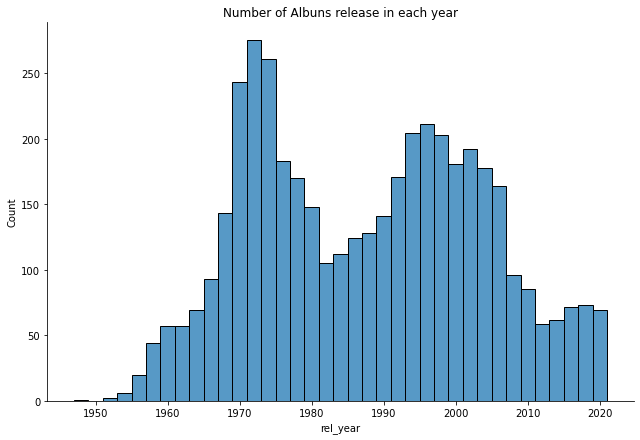

In [39]:
sns.displot(dfs.rel_year, height=6, aspect= 1.5, binwidth = 2)
plt.title("Number of Albuns release in each year");

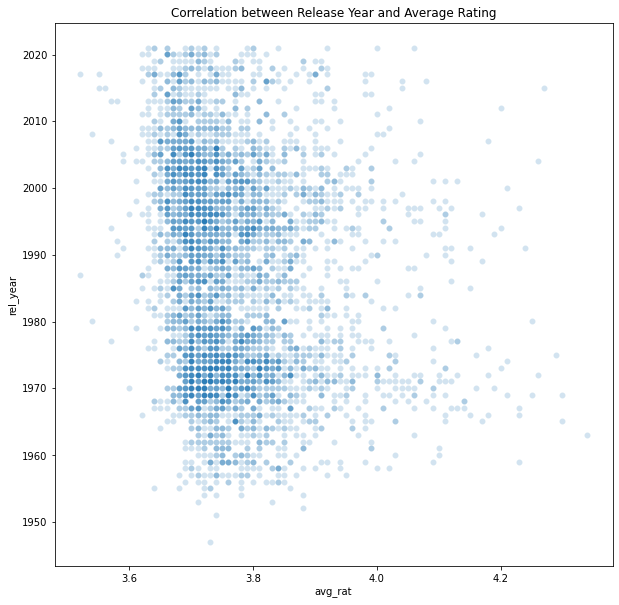

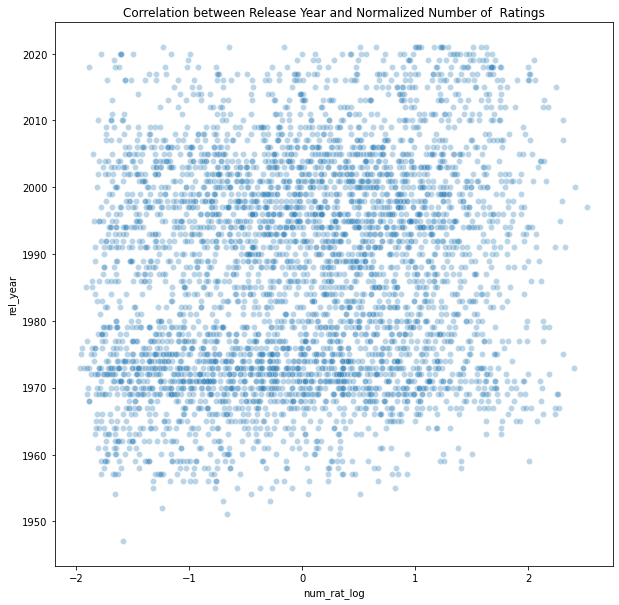

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = dfs.avg_rat, y = ((dfs.rel_year - 1940)/12), alpha = 0.2)
plt.title("Correlation between Release Year and Average Rating")
plt.yticks([0.83,1.66,2.5,3.33,4.166,5,5.833,6.66], 
    [1950,1960,1970,1980,1990,2000,2010,2020]);

plt.figure(figsize=(10,10))
sns.scatterplot(x = dfs.num_rat_log, y = ((dfs.rel_year - 1940)/12), alpha = 0.3)
plt.title("Correlation between Release Year and Normalized Number of  Ratings")
plt.yticks([0.83,1.66,2.5,3.33,4.166,5,5.833,6.66], 
    [1950,1960,1970,1980,1990,2000,2010,2020]);

- ordered categorical by decades
- compare "pinacle" decades to rest

#### Conclusions

### `'gens'`

In [41]:
genres = dfs.gens.str.get_dummies(", ")
# genres[genres == 0] = np.nan # os nulos vão p/ NaN
genres = genres.apply(pd.to_numeric, downcast = "integer") # passa p/ int
# genres.info()

In [42]:
# amount of genres used to describe eacah album
genres.sum(axis = 1).value_counts()

2    2016
1    1652
3     666
4      64
5       4
dtype: int64

In [43]:
# %of 3 genres that are tied
(dfs_gen_org[main_genres][dfs_gen_org[main_genres].sum(axis=1) == 3].mean(axis=1) == 1).sum()/dfs_gen_org[main_genres][dfs_gen_org[main_genres].sum(axis=1) == 3].shape[0]

0.03271028037383177

In [44]:
# percentage of 2 genres that are tied
(dfs_gen_org[main_genres][dfs_gen_org[main_genres].sum(axis=1) == 2].mean(axis=1) == 1).sum()/dfs_gen_org[main_genres][dfs_gen_org[main_genres].sum(axis=1) == 2].shape[0]


0.3818019625334523

- 3 genre descriptors 14/428 [ 3,2% ] are "tied"
- 2 genre descriptors 428/1121 [ 38,1% ] are "tied" 

*over 95% of data has 3 or less individual genres descriptions*

In [45]:
# creates genre_rank to rank each genre descriptor in number of occurrences
genres_rank = genres.sum(axis = 0).sort_values(ascending = False)
genres_rank.index = genres_rank.index.str.replace("-", " ").str.replace("/", " ")
genres_rank = genres_rank.reset_index()
genres_rank.rename(columns={"index": "genre", 0: "instances"}, inplace=True)

In [46]:
# most popular genres and number of occurrences
genres_rank.sort_values("instances", ascending = False).head(20)

genre  instances
0    Singer Songwriter        338
1     Progressive Rock        281
2            Hard Rock        159
3     Alternative Rock        153
4             Pop Rock        142
5          Heavy Metal        140
6   East Coast Hip Hop        115
7            Post Punk        114
8             Art Rock        113
9           Film Score        112
10            Hard Bop        111
11          Indie Rock        107
12          Blues Rock        105
13   Progressive Metal        104
14           Folk Rock        104
15             Art Pop        103
16    Psychedelic Rock        103
17            Post Bop         94
18   Experimental Rock         84
19   Contemporary Folk         82

In [47]:
# most used keywords for genres

genres_all = []
for i in genres_rank.genre:
    genres_all += i.split(" ")

pd.Series(genres_all).value_counts(ascending=False).head(20)

Rock           51
Metal          41
Music          36
Pop            34
Folk           30
Jazz           25
Punk           20
Blues          17
Hop            15
Soul           15
Hip            13
Country        12
New             9
Funk            9
Ambient         8
Progressive     8
Classical       8
Rap             8
Post            8
Black           7
dtype: int64

In [48]:
# creates genre_rat, to aggregate avg_rat/num_rat for each genre
genre_rat = dfs_gen[["album", "avg_rat", "num_rat_log", "rel_year", "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "OtherGen"]].melt(id_vars=("album", "avg_rat", "num_rat_log", "rel_year"))
genre_rat = genre_rat[genre_rat.value != 0]

In [49]:
genre_rat.head()

album  avg_rat  num_rat_log  rel_year variable  \
0                       OK Computer     4.23     2.522328      1997     Rock   
1                Wish You Were Here     4.29     2.307201      1975     Rock   
2  In the Court of the Crimson King     4.30     2.259643      1969     Rock   
3                             Kid A     4.21     2.416579      2000     Rock   
6         The Dark Side of the Moon     4.20     2.406860      1973     Rock   

   value  
0      1  
1      1  
2      1  
3      1  
6      1

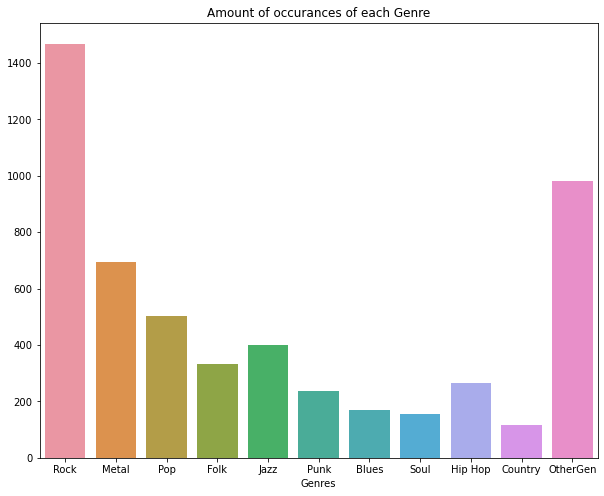

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x = dfs_gen[main_genres].sum().index, y = dfs_gen[main_genres].sum().values)
plt.title("Amount of occurances of each Genre")
plt.xlabel("Genres");

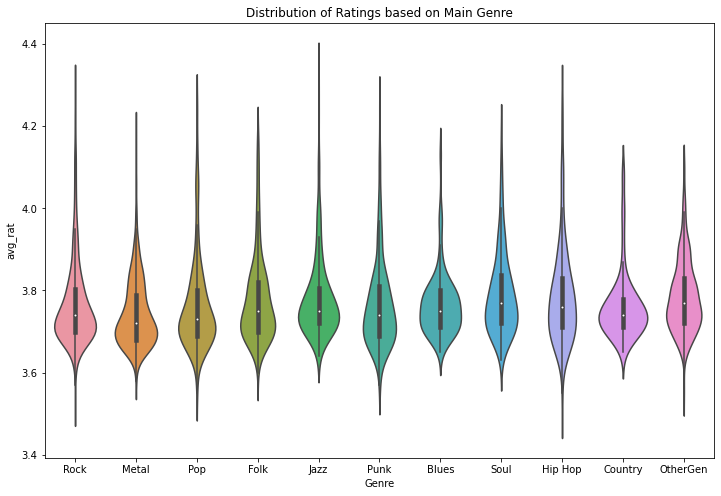

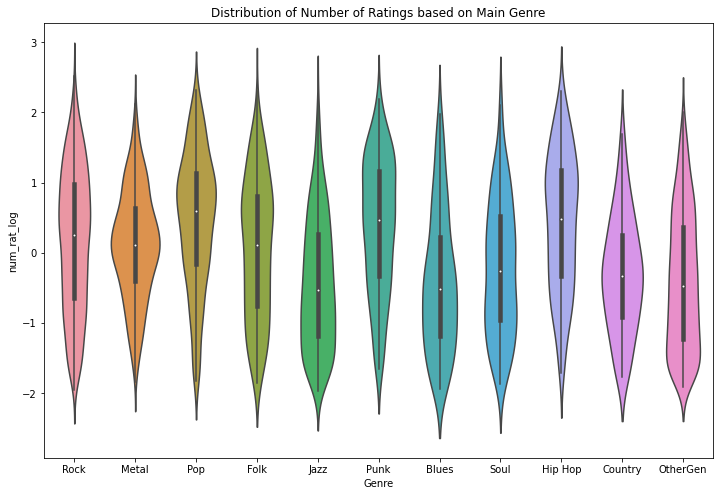

In [51]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_rat, x = "variable", y = "avg_rat")
plt.title("Distribution of Ratings based on Main Genre")
plt.xlabel("Genre");

plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_rat, x = "variable", y = "num_rat_log")
plt.title("Distribution of Number of Ratings based on Main Genre")
plt.xlabel("Genre");

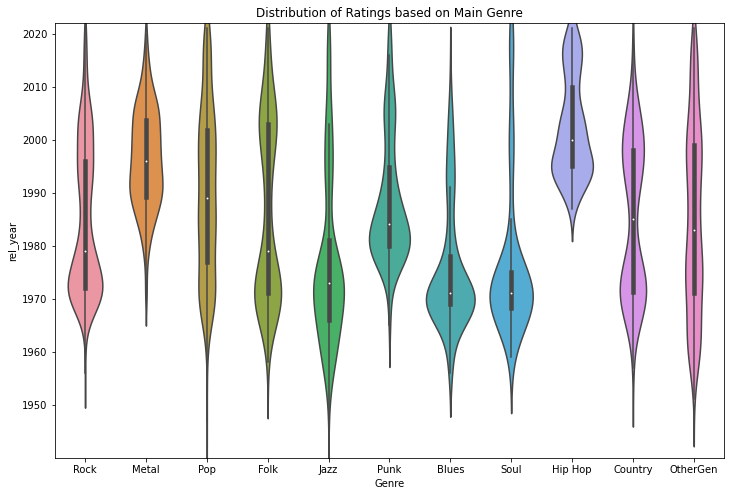

In [52]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_rat, x = "variable", y = "rel_year")
plt.title("Distribution of Ratings based on Main Genre")
plt.yticks([1950,1960,1970,1980,1990,2000,2010,2020])
plt.ylim((1940,2022))
plt.xlabel("Genre");

- percentage of each main genre
- genre score by year

#### Conclusions

### `'avg_rat'`

In [53]:
temp = "avg_rat"

In [54]:
dfs[temp].describe()

count    4402.000000
mean        3.771320
std         0.100606
min         3.520000
25%         3.700000
50%         3.750000
75%         3.810000
max         4.340000
Name: avg_rat, dtype: float64

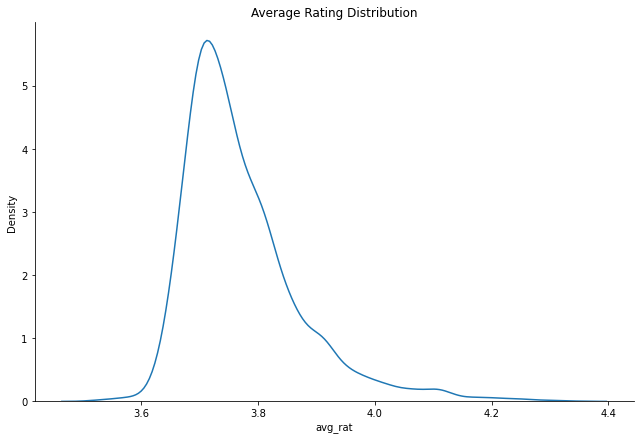

In [55]:
# plt.figure(figsize=(12,8))
sns.displot(dfs[temp],  height=6, aspect= 1.5, kind = "kde")
plt.title("Average Rating Distribution");
#plt.xlim((0, 5))
#plt.ylim((0, 600))

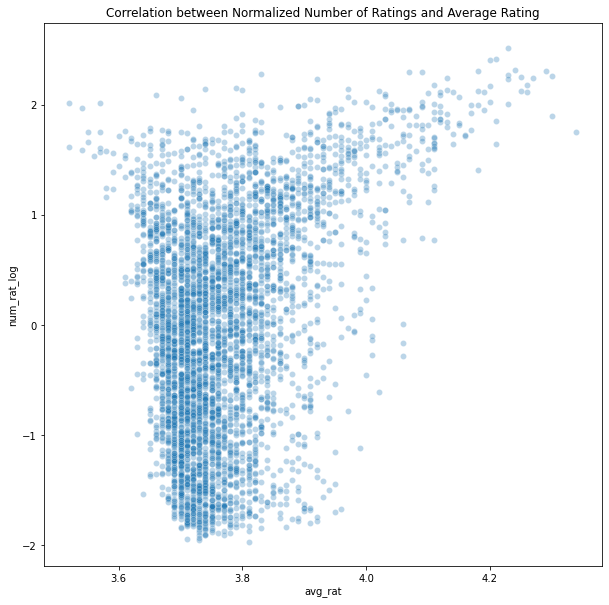

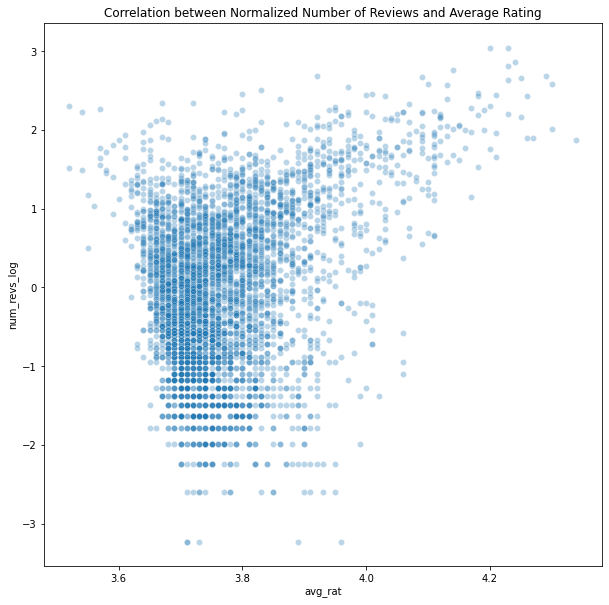

In [56]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_rat_log", alpha= 0.3)
plt.title("Correlation between Normalized Number of Ratings and Average Rating");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_revs_log", alpha= 0.3)
plt.title("Correlation between Normalized Number of Reviews and Average Rating");

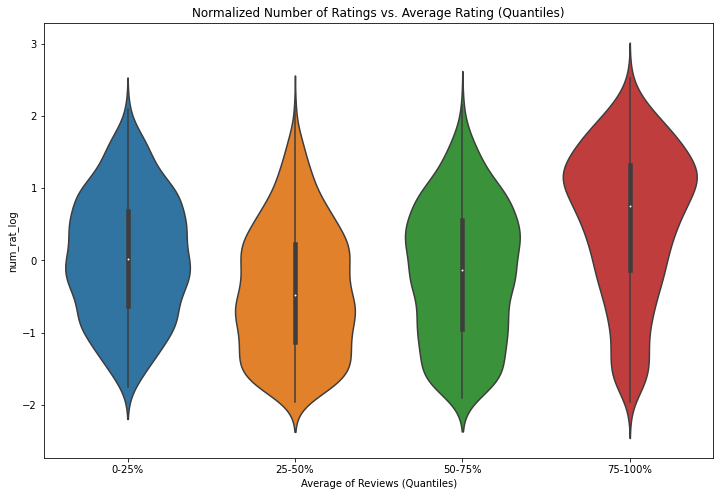

In [57]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = "num_rat_log", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Normalized Number of Ratings vs. Average Rating (Quantiles)")
plt.xlabel("Average of Reviews (Quantiles)");


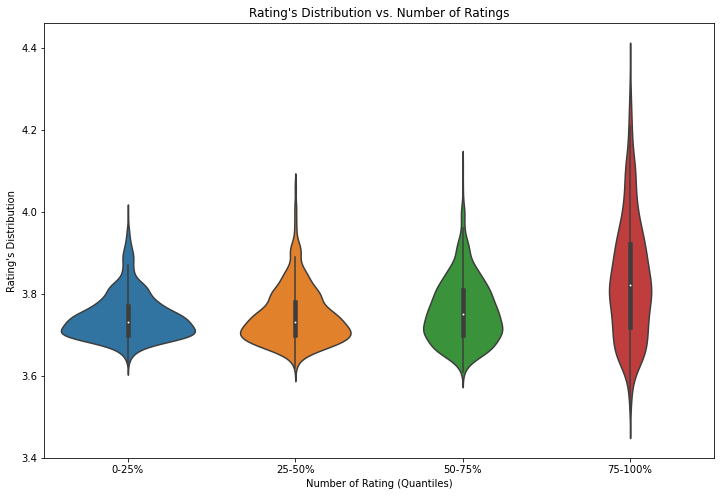

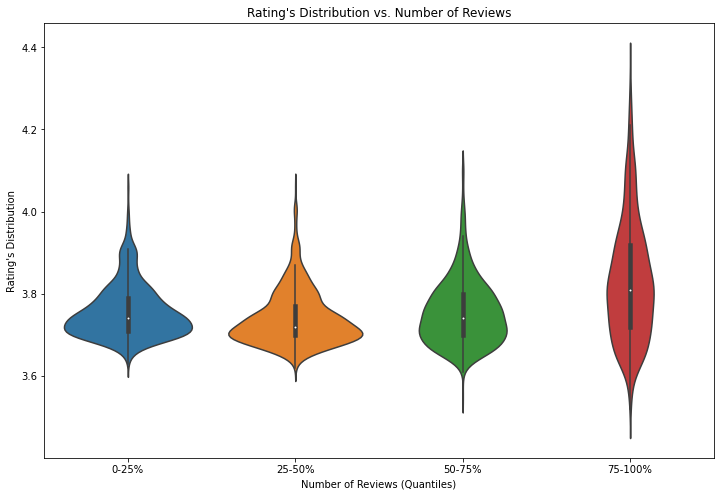

In [58]:
plt.figure(figsize = (12,8))
sns.violinplot(data = dfs, x = "num_rat_qt", y = "avg_rat", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Rating's Distribution vs. Number of Ratings")
plt.xlabel("Number of Rating (Quantiles)")
plt.ylabel("Rating's Distribution");

plt.figure(figsize = (12,8))
sns.violinplot(data = dfs, x = "num_rev_qt", y = "avg_rat", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Rating's Distribution vs. Number of Reviews")
plt.xlabel("Number of Reviews (Quantiles)")
plt.ylabel("Rating's Distribution");

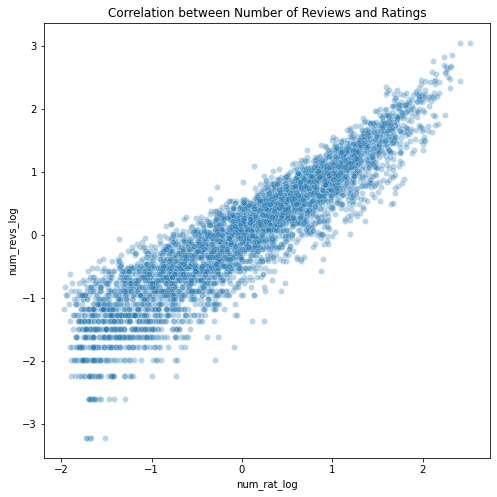

In [59]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = dfs, x = "num_rat_log", y = "num_revs_log", alpha= 0.3)
plt.title("Correlation between Number of Reviews and Ratings");

existe uma correlação linear entre `num_rat_log` e `num_revs_log`, que se torna menos linear com a redução na quantidade

#### Conclusions

- quando `num_rat_log` é > 1, percebemos que a `avg_rat` começa a crescer igualmente
- enquanto `num_rat_log` é < 1, `avg_rat` fica entre **3,65** e **3,85**
- outro comportamento interessante é que os albuns pior avaliados também estão entre os mais populares

A conclusão que podemos chegar é que com o aumento na quantidade de avaliações, a distribuição das notas fica mais "achatada", e temos valores mínimos e máximos mais extremos

- a correlação entre `avg_rat` e `num_revs_log` é similar à anterior ( X `num_rat_log` ), no entanto sofre c/ o agrupamento p/ instâncias com poucos reviews (< 10)

### `'num_rat'` and `'num_revs'`


In [60]:
temp = dfs.num_rat

In [61]:
temp.describe()

count     4402.000000
mean      4346.915720
std       6228.544443
min        260.000000
25%        818.250000
50%       2002.500000
75%       5156.500000
max      70382.000000
Name: num_rat, dtype: float64

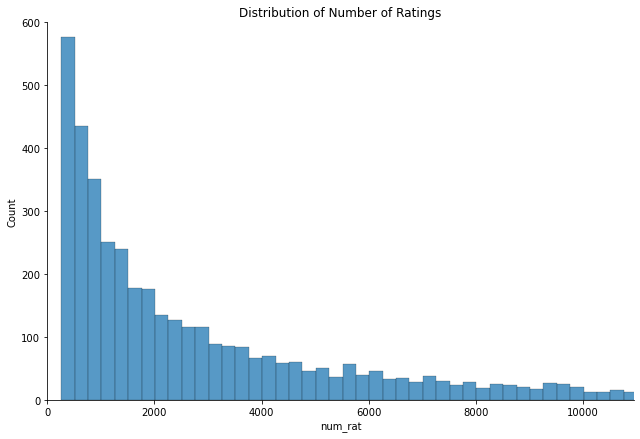

In [62]:
# plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 250, height=6, aspect= 1.5)
plt.xlim((0, temp.quantile(0.90)))
plt.ylim((0, 600))
plt.title("Distribution of Number of Ratings");

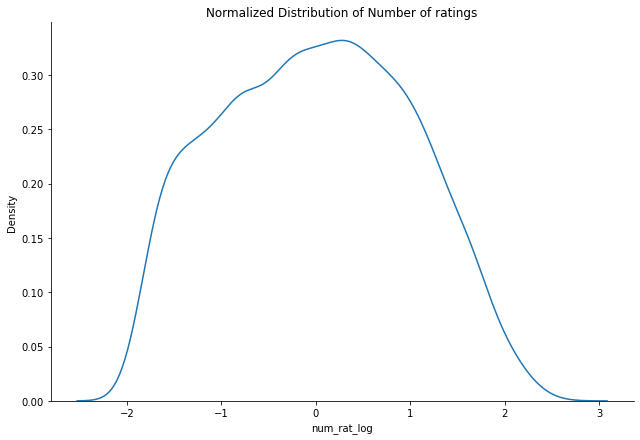

In [63]:
temp = dfs.num_rat_log
# plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde",height=6, aspect= 1.5)
plt.title("Normalized Distribution of Number of ratings");
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

In [64]:
temp = dfs.num_revs

In [65]:
temp.describe()

count    4402.000000
mean       76.538846
std       112.977848
min         0.000000
25%        16.000000
50%        39.000000
75%        91.000000
max      1549.000000
Name: num_revs, dtype: float64

<Figure size 864x576 with 0 Axes>

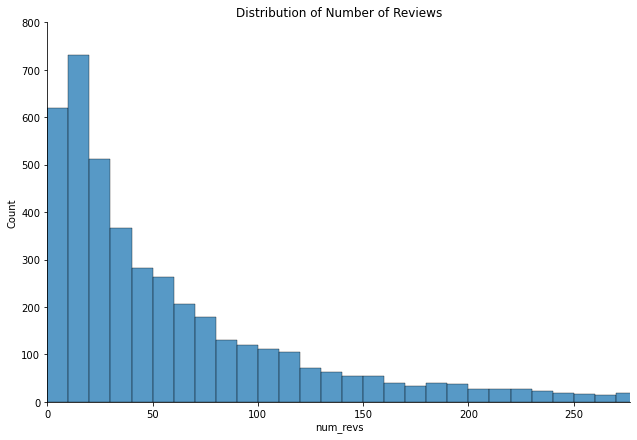

In [66]:
plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 10, height=6, aspect= 1.5);
plt.xlim((0, temp.quantile(0.95)));
plt.ylim((0, 800));
plt.title("Distribution of Number of Reviews");

<Figure size 864x576 with 0 Axes>

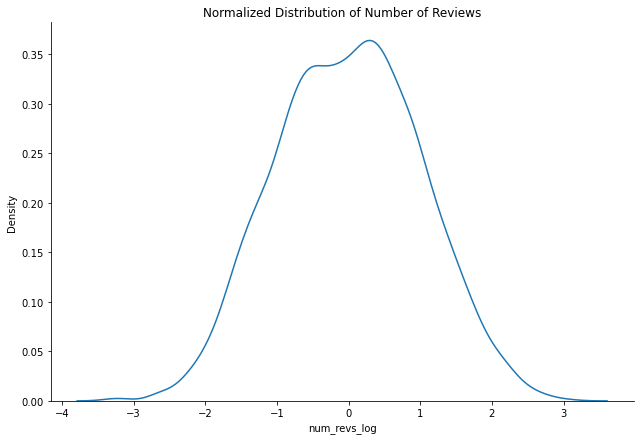

In [67]:
temp = dfs.num_revs_log
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5);
plt.title("Normalized Distribution of Number of Reviews");
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

`num_revs_log` < -1 tem agrupamento
- fazer inverse transform p/ identificar o número real

In [68]:
log_transformer2.inverse_transform(np.reshape(
    dfs.num_revs_log[dfs.num_revs_log < -1].value_counts().index, (-1,1)))

array([[ 8.],
       [ 6.],
       [ 9.],
       [ 5.],
       [ 7.],
       [10.],
       [ 4.],
       [11.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 0.]])

#### Conclusion

### Music Descriptors

Creates `dfs_ml` a table with only the *genre* and *music descriptors*

In [69]:
# creates genre_rat, to aggregate avg_rat/num_rat for each genre
genre_desc = dfs_gen[['acousticness', 'danceability', 'energy','instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo','valence', 'duration_s', 
    'time_signature', 'rel_year',
    "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "OtherGen"]].melt(id_vars=
    ('acousticness', 'danceability', 'energy','instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo','valence', 'duration_s', 
    'time_signature', 'rel_year'))
genre_desc = genre_desc[genre_desc.value != 0]

In [70]:
genre_desc.head()

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.135763      0.288083  0.565917          0.161053  0.159375   
1      0.602800      0.373600  0.409800          0.363040  0.384940   
2      0.297686      0.340625  0.370475          0.327265  0.149138   
3      0.123219      0.601294  0.676706          0.000669  0.311412   
6      0.390310      0.383000  0.400450          0.595929  0.237680   

    loudness  speechiness       tempo   valence  duration_s  time_signature  \
0  -9.102417     0.056308  115.450750  0.291733  268.435500        4.000000   
1 -12.689400     0.039740  130.018800  0.259040  530.512000        3.600000   
2 -14.873125     0.043463  118.920625  0.279400  507.644125        3.875000   
3  -7.811941     0.268318  116.045059  0.398206  325.379529        4.058824   
6 -15.701900     0.058660  120.066200  0.272830  257.363600        3.700000   

   rel_year variable  value  
0      1997     Rock      1  
1      1975     Rock      1  
2      1969     Rock      1  
3      2000     Rock      1  
6      1973     Rock      1

#### `'acousticness'`

*A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.*


In [71]:
temp = "acousticness"

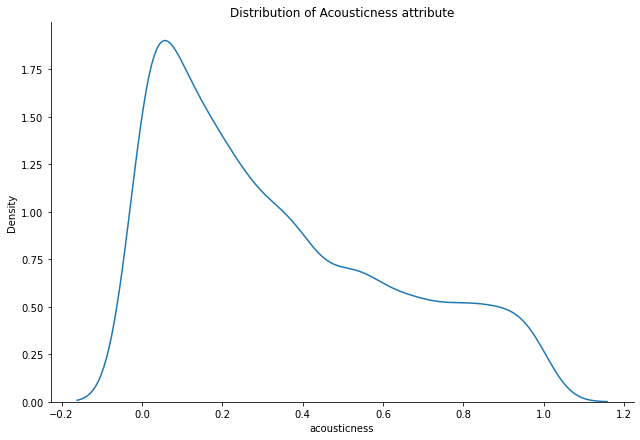

In [72]:

sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Acousticness attribute");


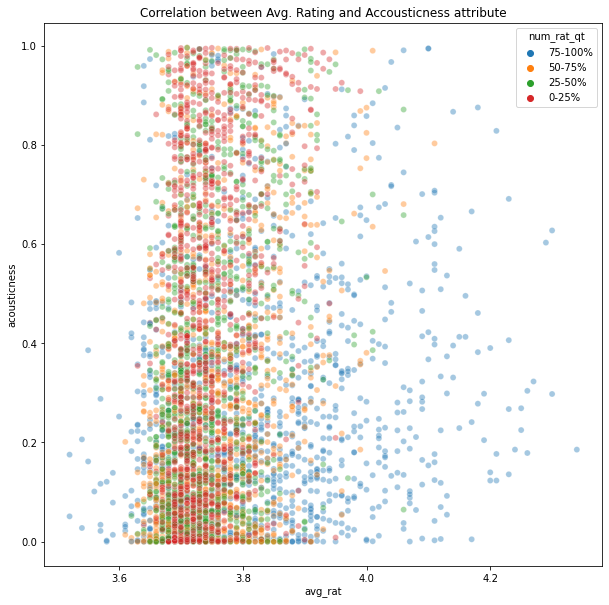

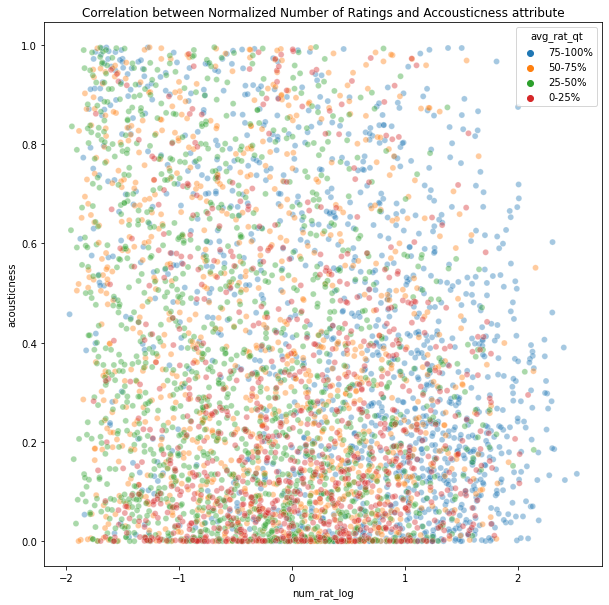

In [73]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp,hue = "num_rat_qt", alpha= 0.4)
plt.title("Correlation between Avg. Rating and Accousticness attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and Accousticness attribute");

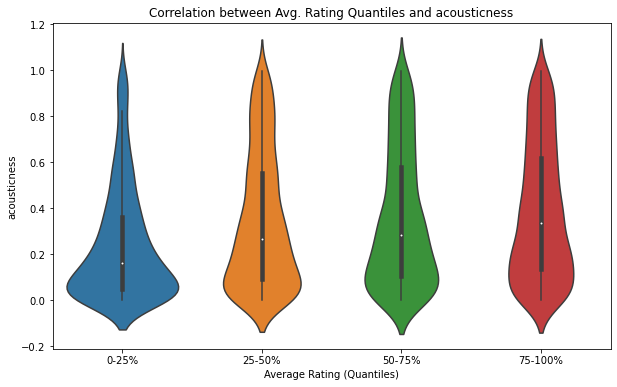

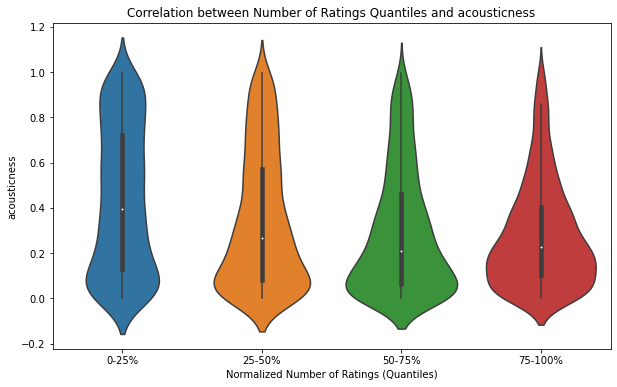

In [74]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

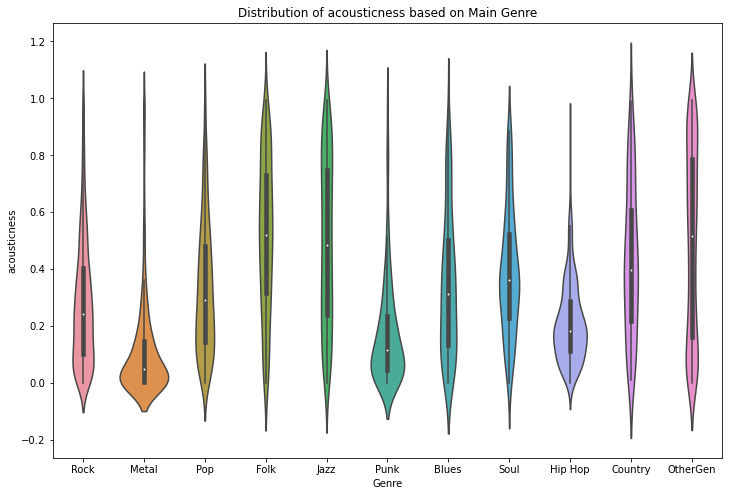

In [75]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

TO-DO

- does accoustic albuns have a significant difference?

##### Conclusion

asd

#### `'danceability'`

*Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*

In [76]:
temp = "danceability"

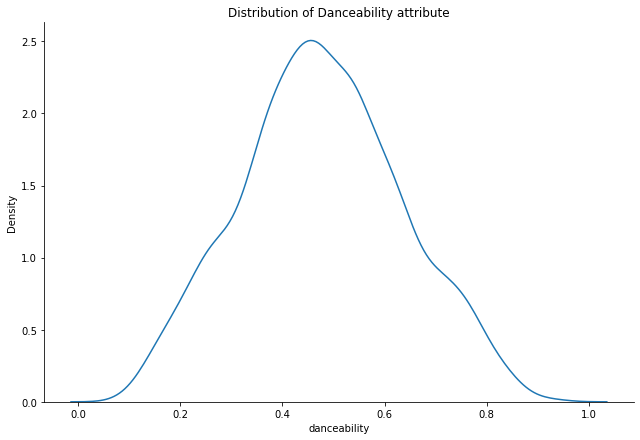

In [77]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Danceability attribute");


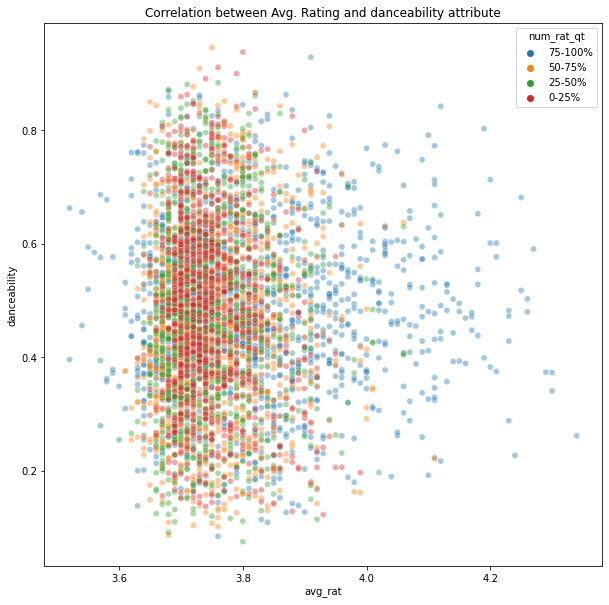

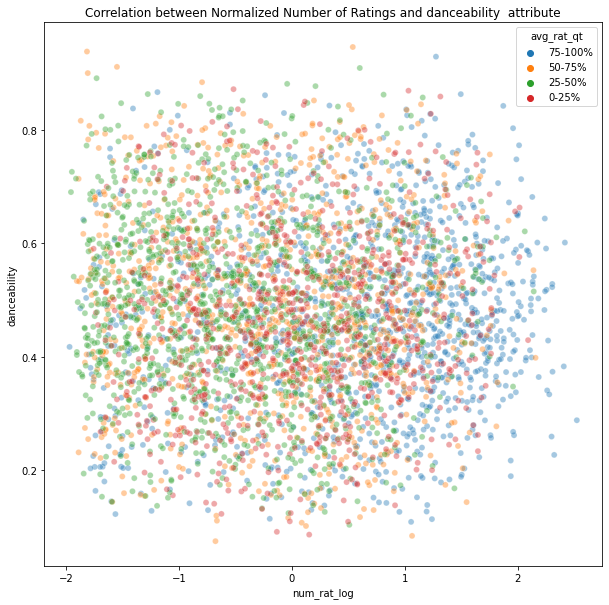

In [78]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

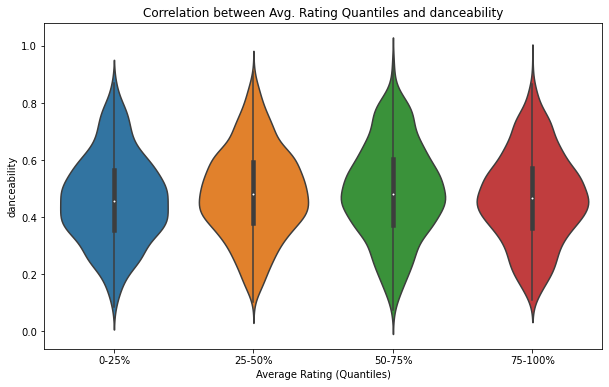

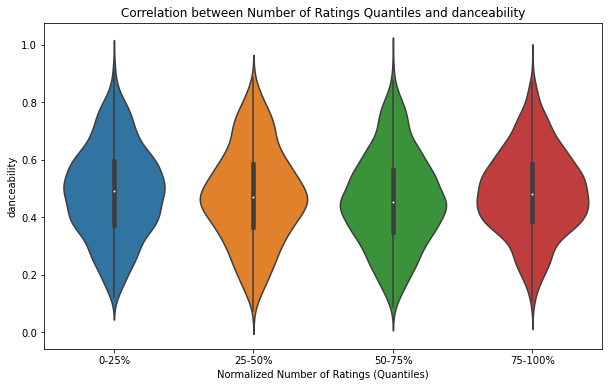

In [79]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp);
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp);
plt.xlabel("Normalized Number of Ratings (Quantiles)");

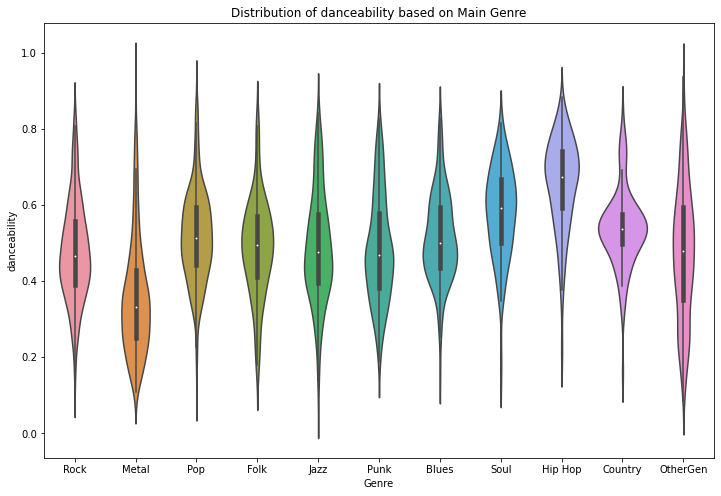

In [80]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

- Seems to have very little influence in ratings or popularity

#### `'energy'`

*Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.*

In [81]:
temp = "energy"

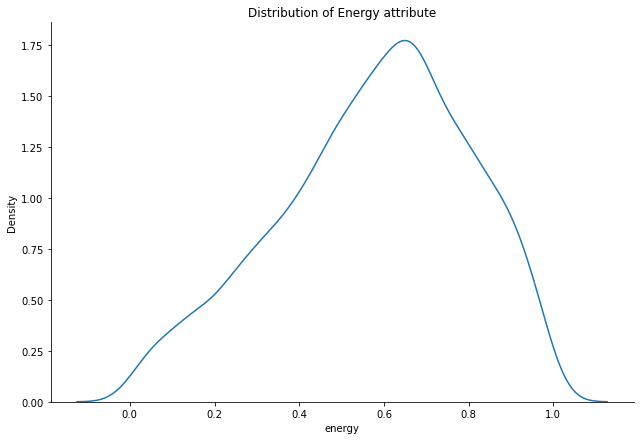

In [82]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Energy attribute");

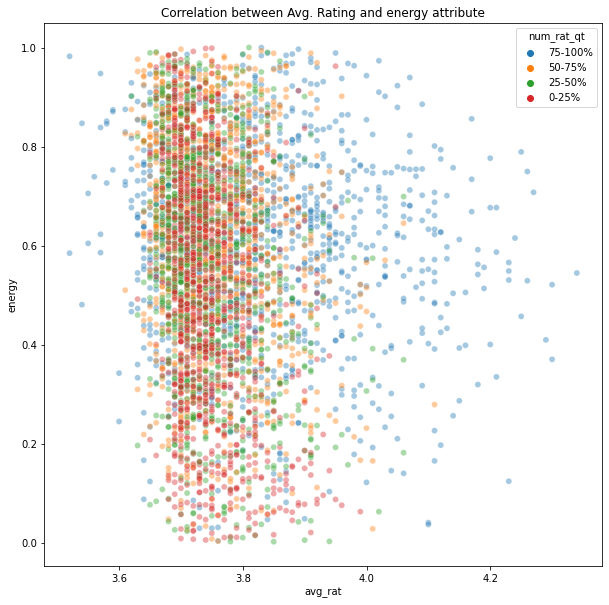

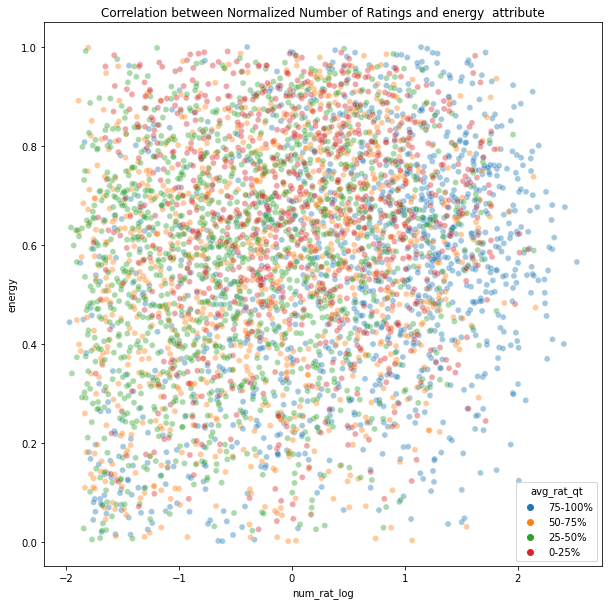

In [83]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

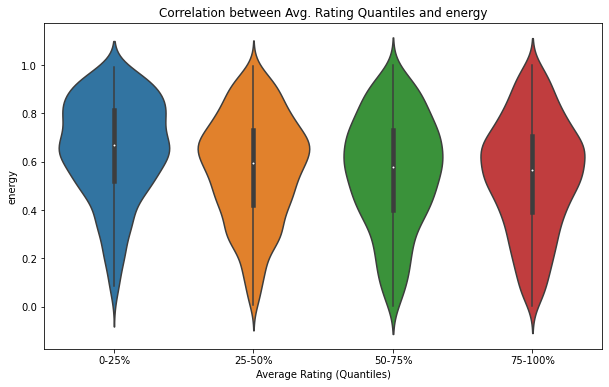

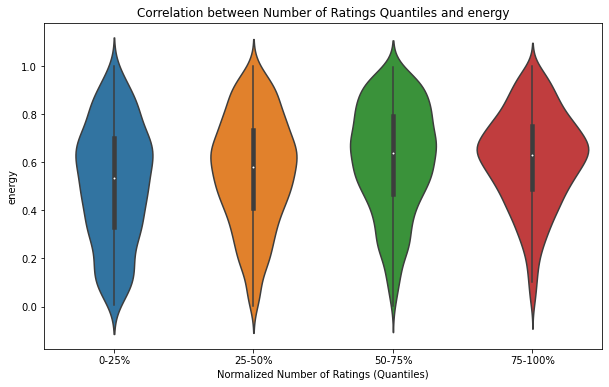

In [84]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

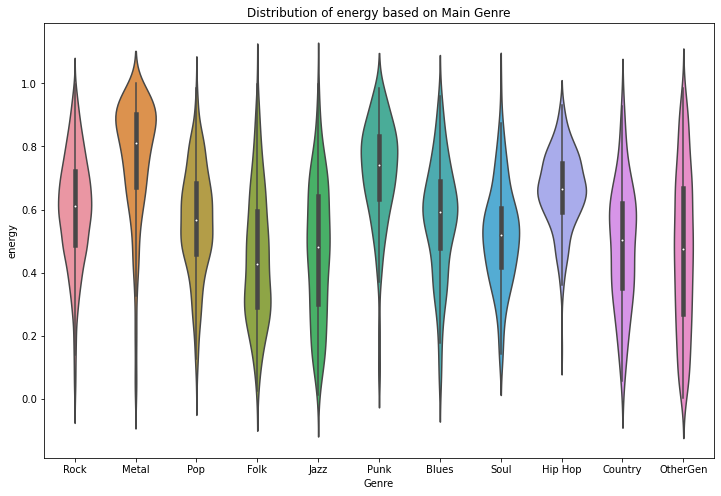

In [85]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'instrumentalness'`

*Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.*

In [86]:
temp = "instrumentalness"

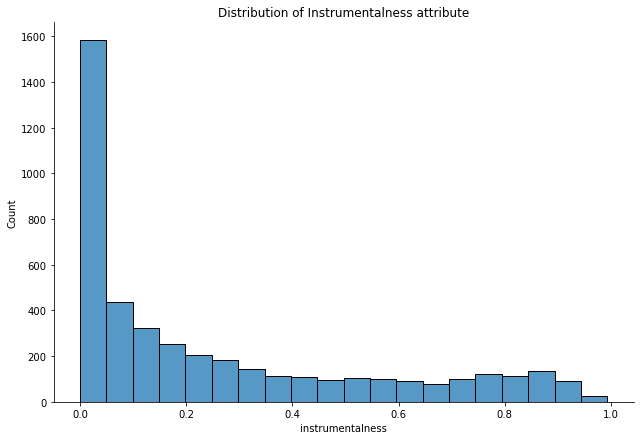

In [87]:
sns.displot(dfs[temp], kind = "hist", height=6, aspect= 1.5)
plt.title("Distribution of Instrumentalness attribute");

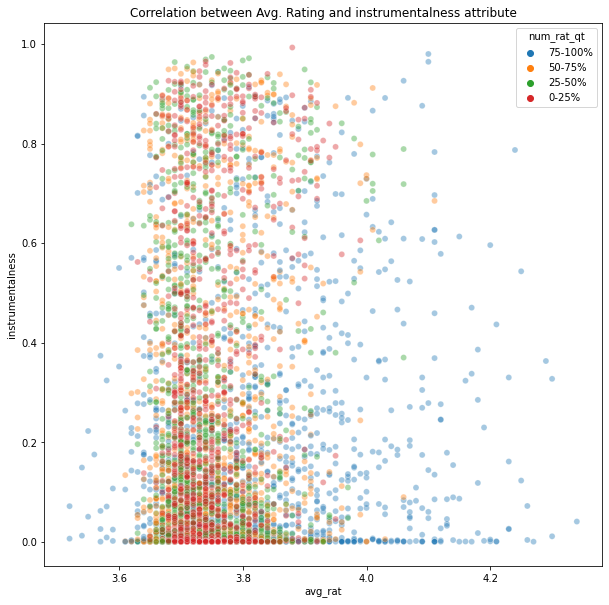

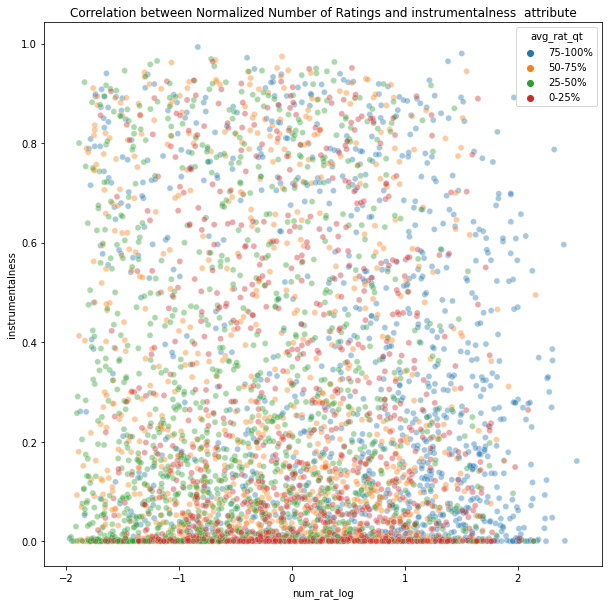

In [88]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

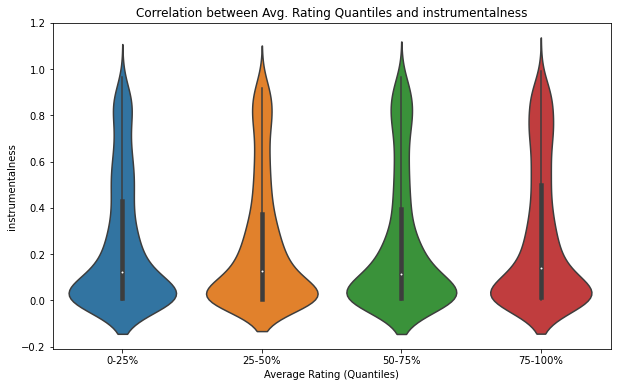

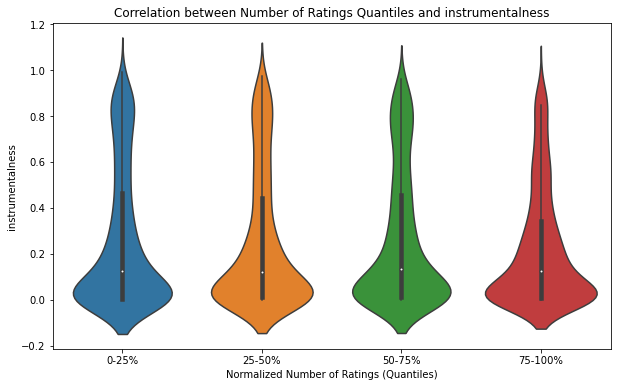

In [89]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

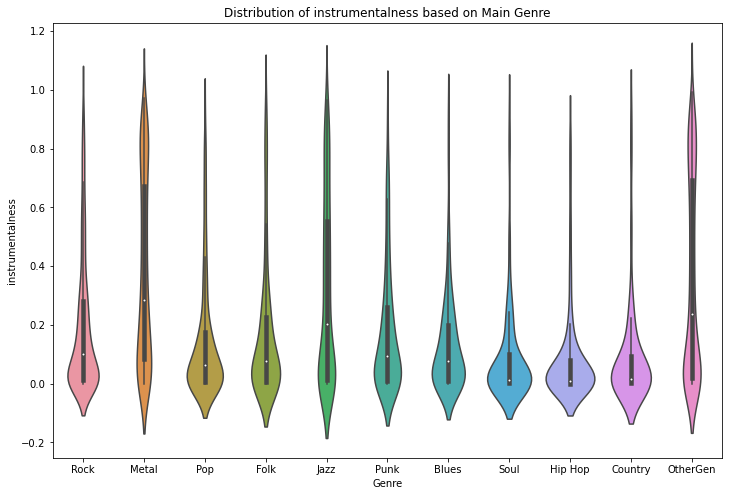

In [90]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

***TO-DO*** Fazer uma comparação entre `intrumentalness` == 0 e != 0

##### Conclusion

asd

#### `'liveness'`

*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.*

In [91]:
temp = "liveness"

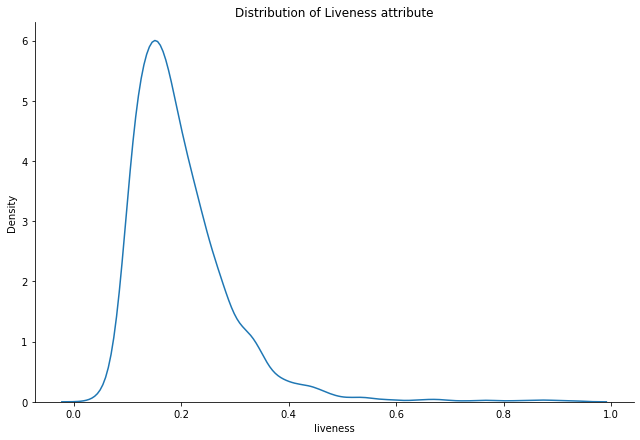

In [92]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Liveness attribute");

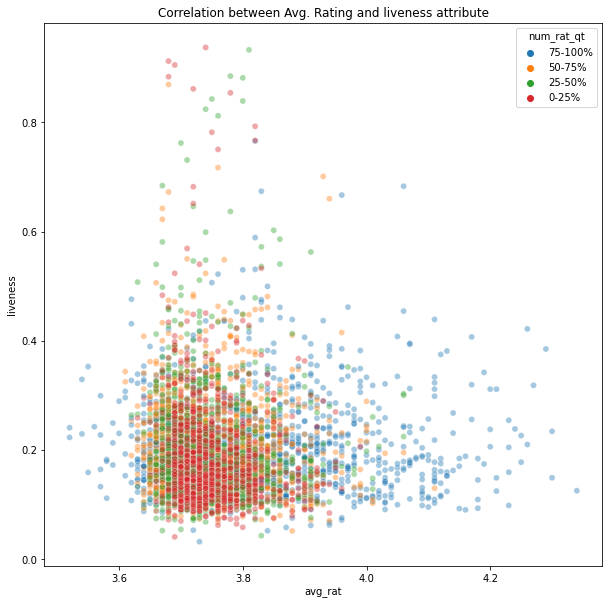

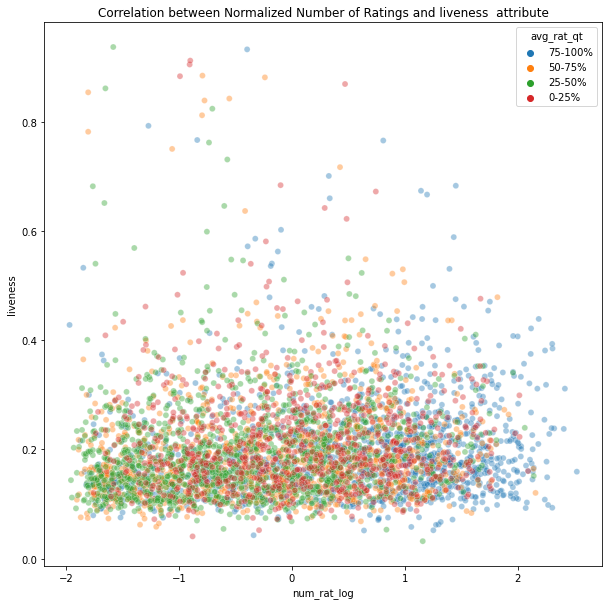

In [93]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

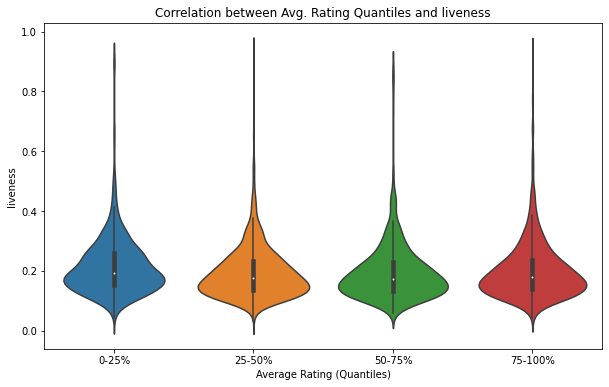

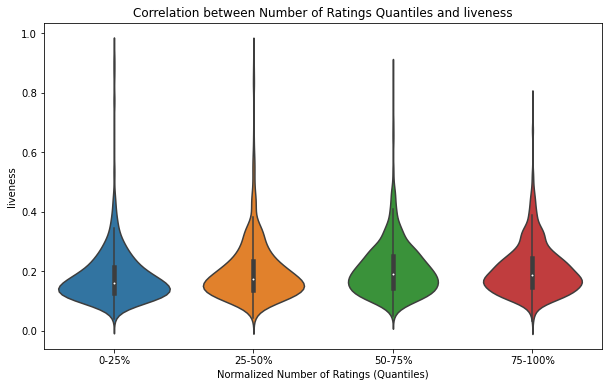

In [94]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp);
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

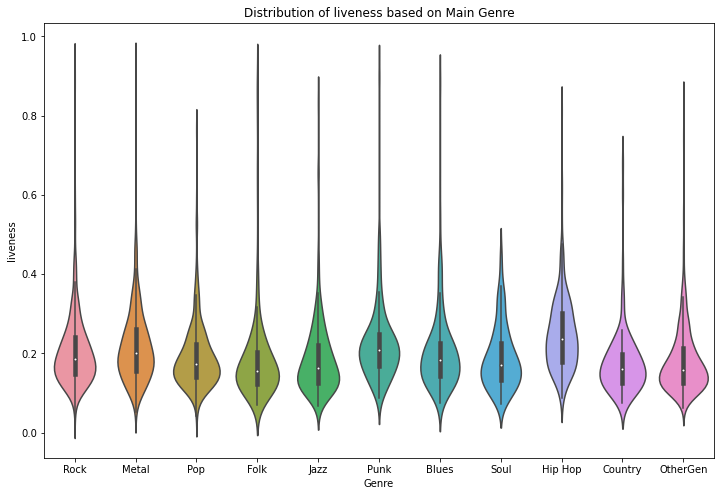

In [95]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

***TO-DO*** Fazer uma comparação entre `liveness` > 0.8 e != 0

##### Conclusion

asd

#### `'loudness'`

*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.*

In [96]:
temp = "loudness"

Text(0.5, 1.0, 'Distribution of Loudness Attribute')

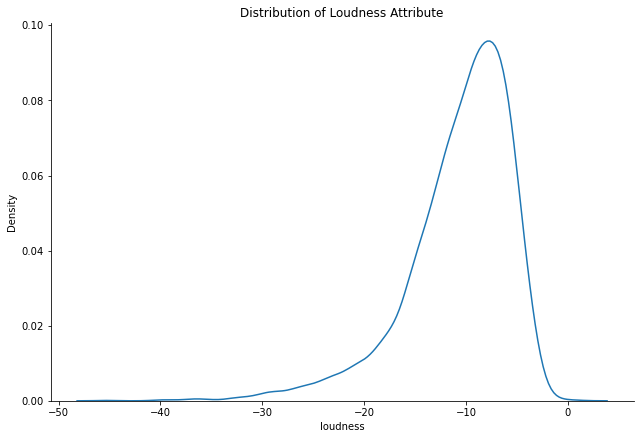

In [97]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Loudness Attribute")

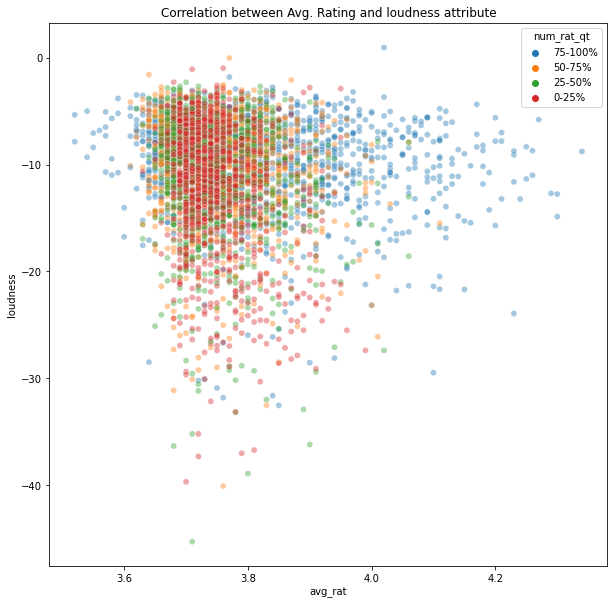

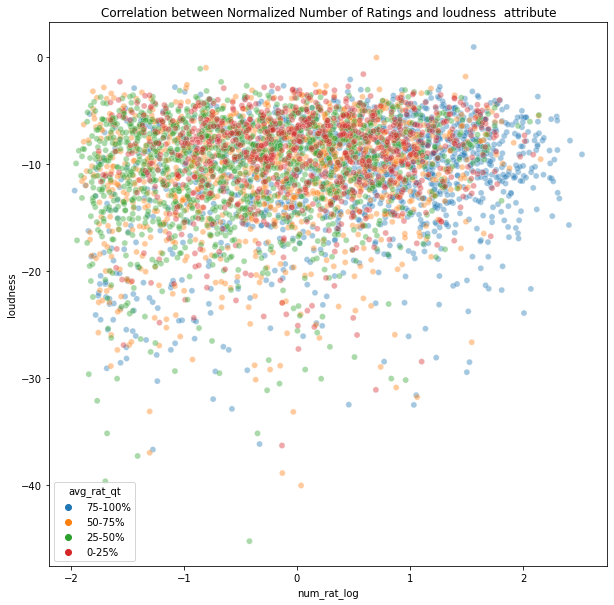

In [98]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

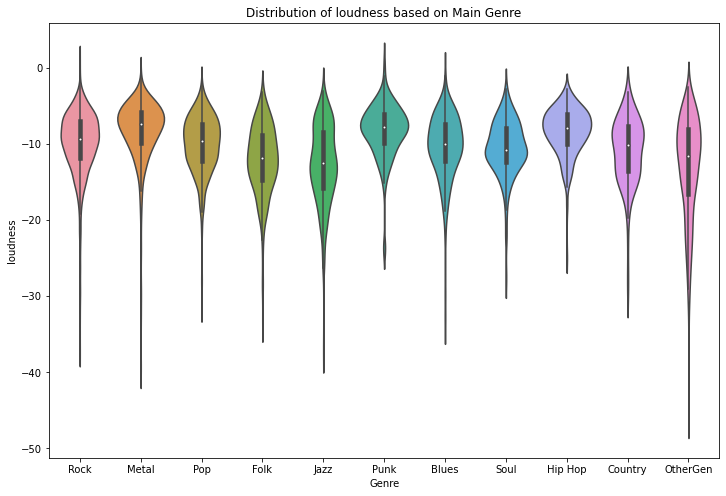

In [99]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'speechiness'`

*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.*

In [100]:
temp = "speechiness"

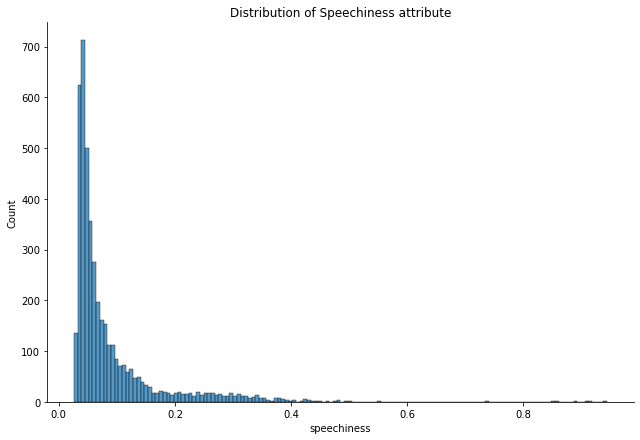

In [101]:
sns.displot(dfs[temp], kind = "hist", height=6, aspect= 1.5)
plt.title("Distribution of Speechiness attribute");

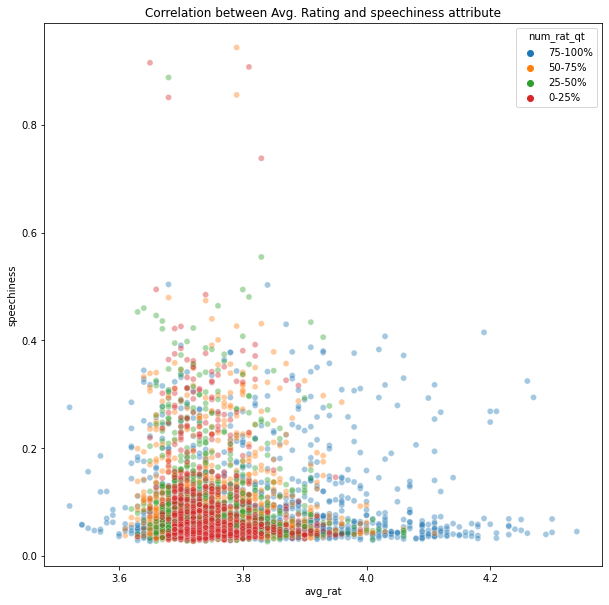

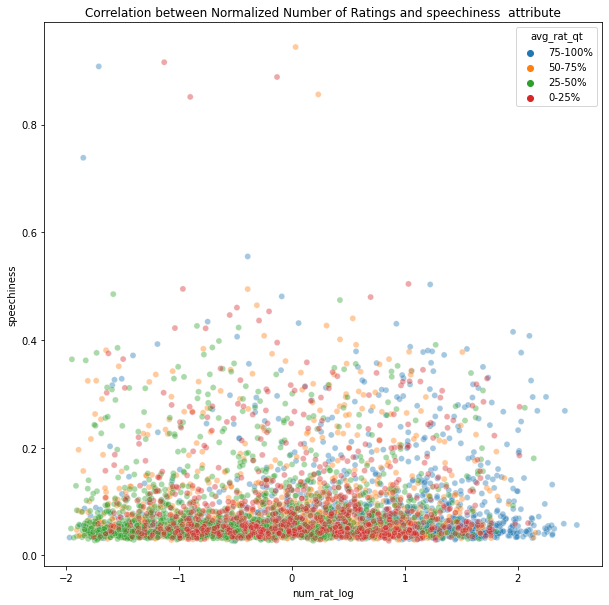

In [102]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

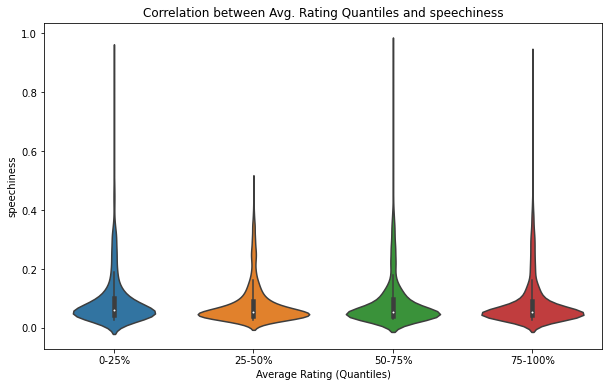

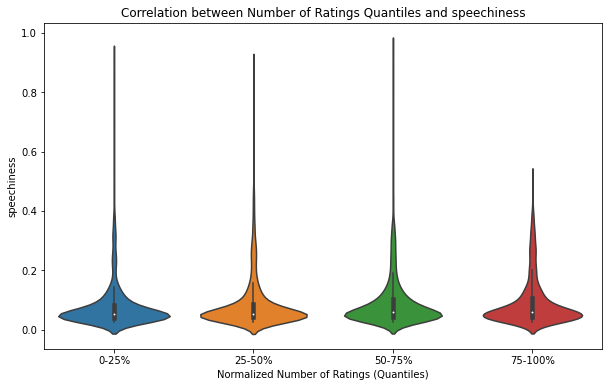

In [103]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

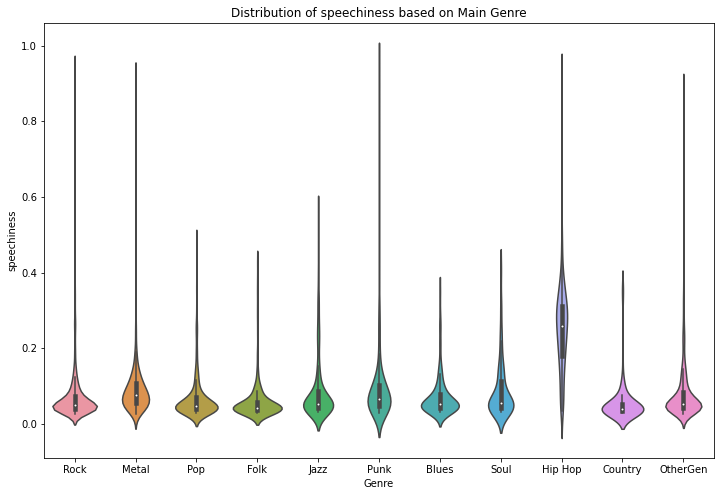

In [104]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'tempo'`

*The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.*

In [105]:
temp = "tempo"

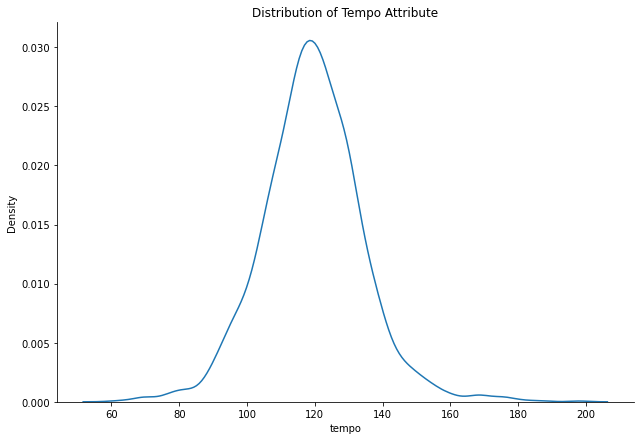

In [106]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Tempo Attribute");

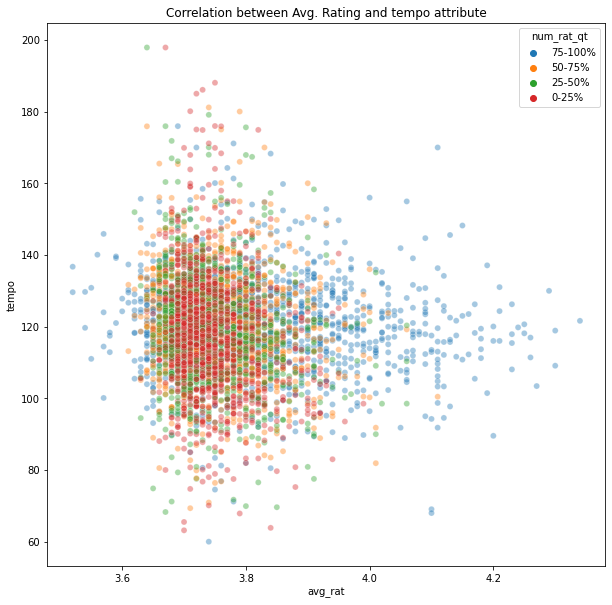

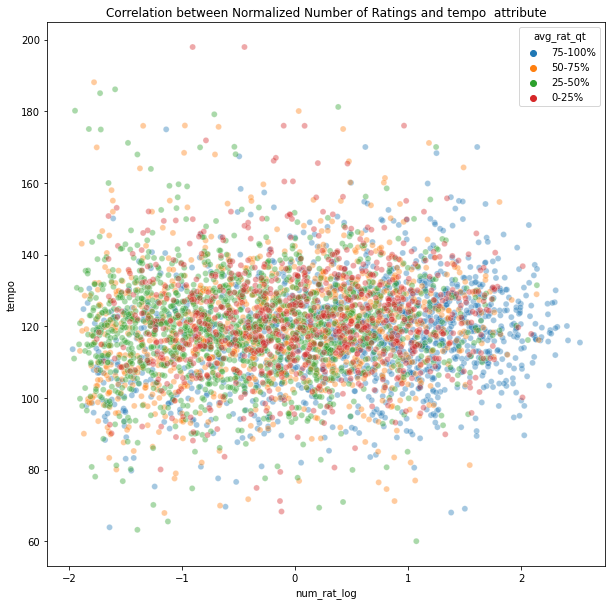

In [107]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

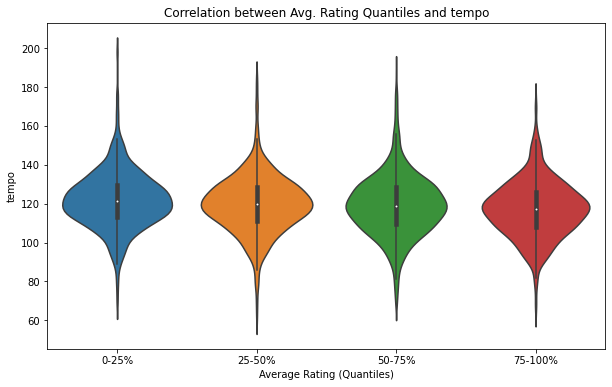

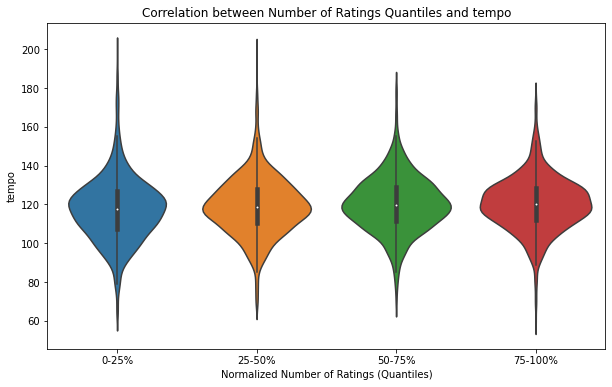

In [108]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

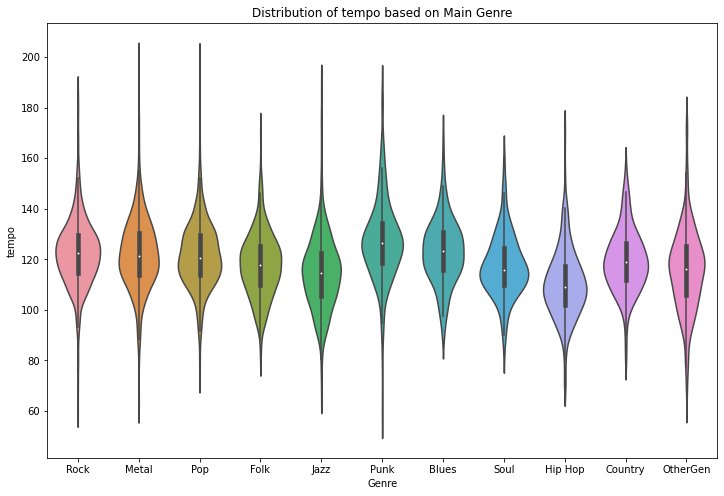

In [109]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'valence'`

*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

In [110]:
temp = "valence"

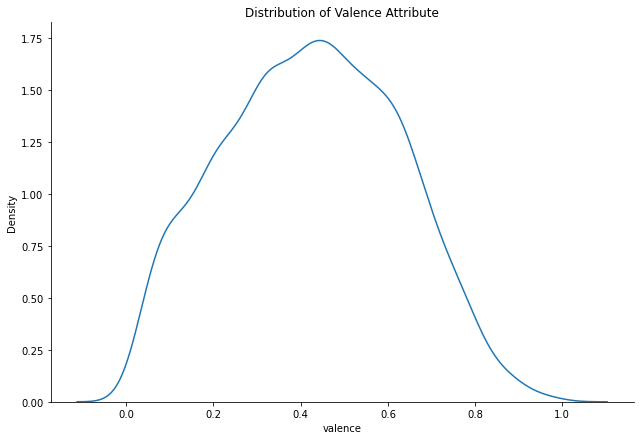

In [111]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5);
plt.title("Distribution of Valence Attribute");

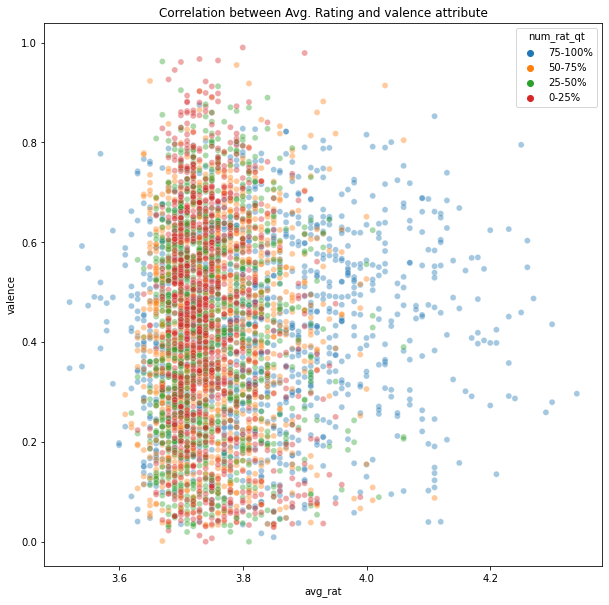

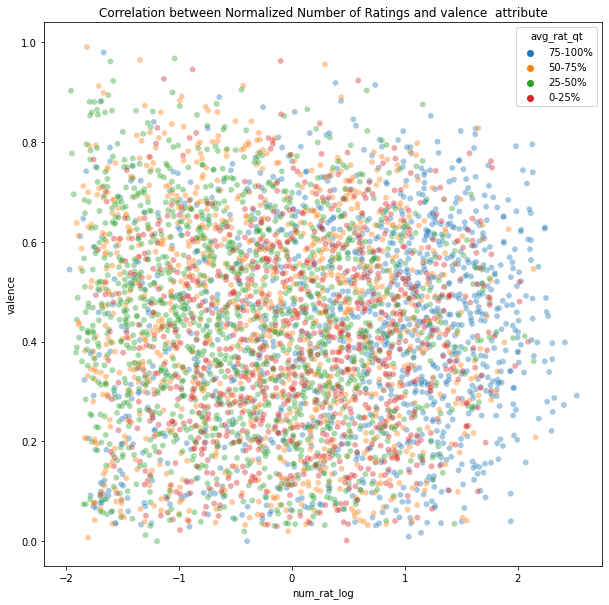

In [112]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

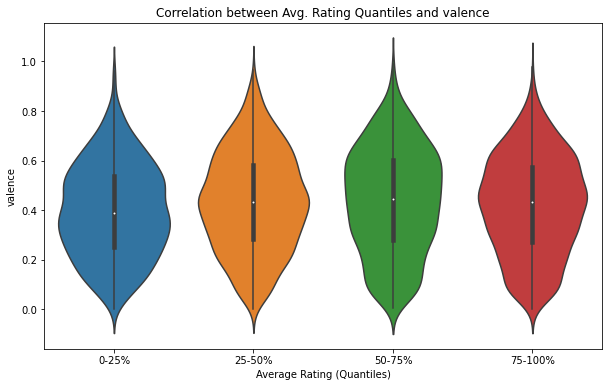

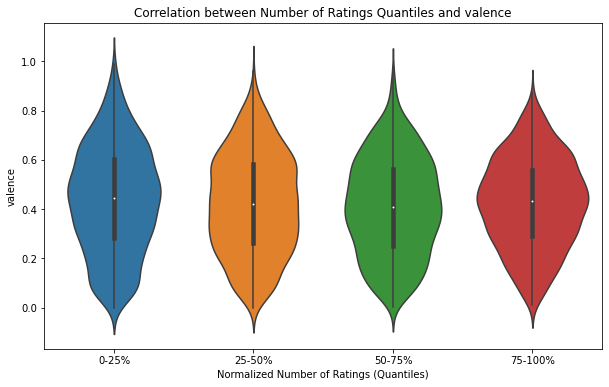

In [113]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

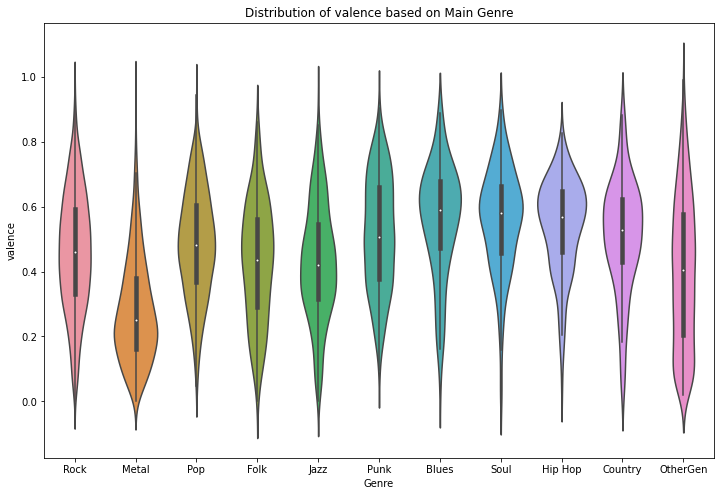

In [114]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'duration_s'`


In [115]:
temp = "duration_s"

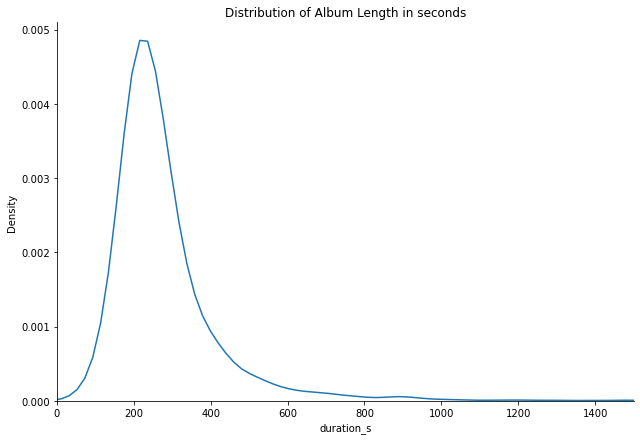

In [116]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Album Length in seconds")
plt.xlim((0, 1500));

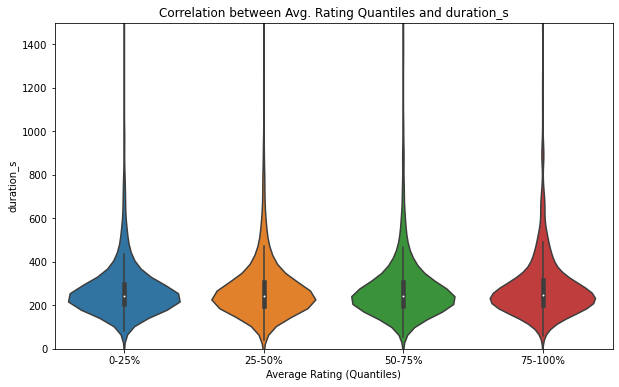

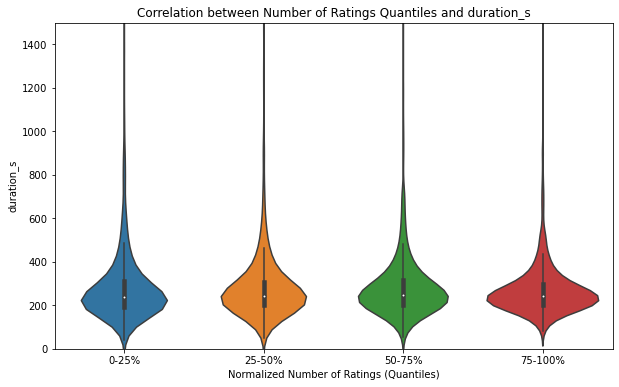

In [117]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.ylim((0, 1500))
plt.xlabel("Average Rating (Quantiles)");


plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.ylim((0, 1500))
plt.xlabel("Normalized Number of Ratings (Quantiles)");

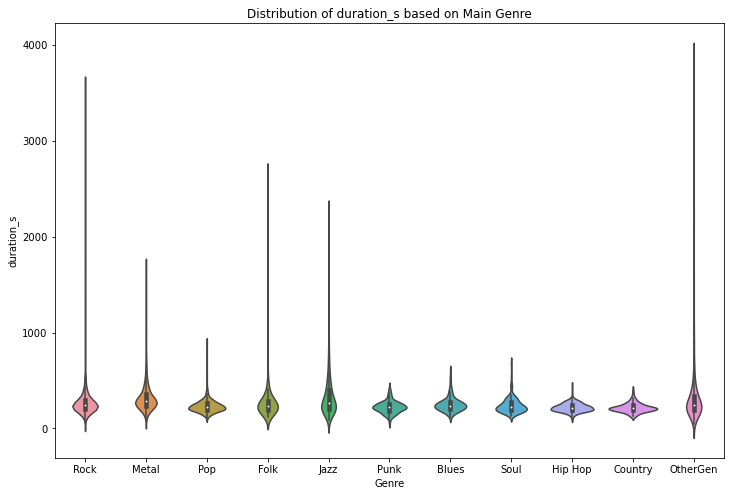

In [118]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

In [119]:
dfs.sort_values("duration_s", ascending = True).head(20)

ars_name   rel_date  \
4331                                              Atila 1976-01-01   
3182                                            Fantasy 1973-12-01   
3269  Konzerthaus Kammerorchester Berlin / André de ... 2012-08-31   
3622                                          NoMeansNo 1991-10-01   
1546                                         The Saints 1977-02-21   
422                                Toby "Radiation" Fox 2015-08-13   
3151                                              Focus 1971-10-01   
4055                                  近藤浩治 [Koji Kondo] 1991-02-25   
3404                                                Axe 1970-01-01   
2707                                          High Tide 1969-10-01   
1860  Howard Shore, Ornette Coleman & The London Phi... 1992-02-11   
2797                                     Death Toll 80k 2011-07-08   
2318                                     Insect Warfare 2007-09-10   
3992                                     Three Man Army 1971-01-01   
1293                                        Mark Morgan 1998-01-01   
4207                                        Leatherwolf 1989-01-01   
2027                              SpongeBob SquarePants 2005-11-15   
3318                                       Sacred Blade 1986-01-01   
3652                                            Helstar 1988-11-29   
1862                                       Gentle Giant 1975-09-01   

                                                   gens  \
4331                                   Progressive Rock   
3182                   Progressive Rock, Symphonic Prog   
3269                                   Modern Classical   
3622                            Post-Hardcore, Art Punk   
1546                                          Punk Rock   
422               Video Game Music, Sequencer & Tracker   
3151                   Progressive Rock, Symphonic Prog   
4055                 Video Game Music, 16-bit, Chiptune   
3404                        Acid Rock, Psychedelic Rock   
2707                      Heavy Psych, Progressive Rock   
1860  Film Score, Third Stream, Cinematic Classical,...   
2797                                          Grindcore   
2318                                          Grindcore   
3992                             Hard Rock, Heavy Psych   
1293                     Video Game Music, Dark Ambient   
4207                        Heavy Metal, US Power Metal   
2027  Television Music, Musical Comedy, Children's M...   
3318                     Heavy Metal, Progressive Metal   
3652           Heavy Metal, Power Metal, US Power Metal   
1862                                   Progressive Rock   

                                                  descs  avg_rat  num_rat  \
4331                                                NaN     3.71      265   
3182            melodic, progressive, epic, male vocals     3.74      374   
3269  acoustic, instrumental, orchestral, lush, seas...     3.68     1701   
3622  rhythmic, energetic, humorous, quirky, satiric...     3.70     1198   
1546  energetic, raw, male vocals, rebellious, sexua...     3.79     2056   
422   instrumental, uplifting, eclectic, bittersweet...     3.92     3891   
3151  autumn, playful, melodic, pastoral, warm, mell...     3.71     2037   
4055              fantasy, instrumental, happy, melodic     3.70      537   
3404     lo-fi, female vocals, psychedelic, atmospheric     3.72      441   
2707  heavy, energetic, psychedelic, male vocals, no...     3.72     1985   
1860                                      dark, ominous     3.80      352   
2797  heavy, aggressive, energetic, male vocals, raw...     3.73      622   
2318  aggressive, apocalyptic, chaotic, heavy, male ...     3.74     2048   
3992                                                NaN     3.70      365   
1293  apocalyptic, dark, ritualistic, mechanical, no...     3.82      577   
4207  melodic, male vocals, energetic, triumphant, u...     3.70      294   
2027  children's music, hum

TO-DO

get a sorted by `duration_s` to see if is there anything wrong, or i don't know

is, most of the duration doesn't match the albuns true length, why? it seems that the duration is related to a singel song on the album, and albuns that have only one song have this distorted measure

##### Conclusion

asd

#### `'time_signature'`

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

\>= 3  <= 7

##### `time_signature` decoding

One source says its a time signature, that can range from 3 to 7 (as in *3/4* or *7/4* time signature)

The data ranges from 1 to 5, and we can see that some of the data is a fraction o *X/3*, some have a *X.X000* format

From Source: *An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).* 

https://search.r-project.org/CRAN/refmans/billboard/html/spotify_track_data.html

From Source2: *time_signature*  -  ***integer***

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

*\>= 3  <= 7*

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [120]:
dfs.time_signature.value_counts().head(20)

4.000000    1581
3.900000     127
3.800000     124
3.750000     115
3.916667     104
3.875000     104
3.833333      98
3.666667      96
3.500000      87
3.888889      83
3.909091      83
3.857143      69
3.923077      66
3.600000      66
3.928571      55
3.700000      49
3.818182      47
3.937500      47
3.846154      46
3.933333      44
Name: time_signature, dtype: int64

In [121]:
dfs.time_signature.describe()

count    4402.000000
mean        3.855067
std         0.226416
min         1.000000
25%         3.769231
50%         3.916667
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

(3.0, 4.5)

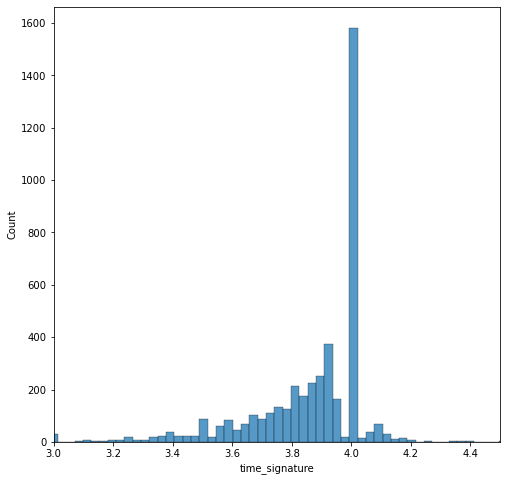

In [122]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((3, 4.5))

(0.0, 450.0)

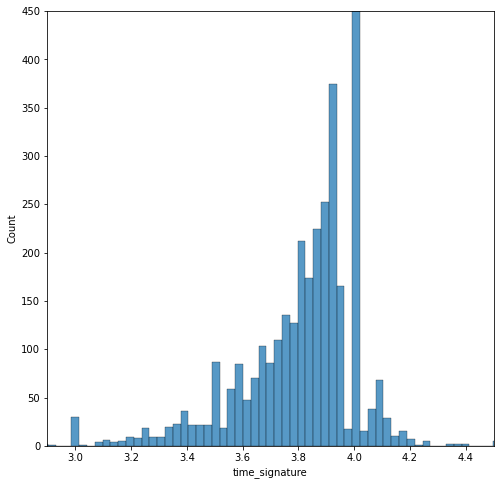

In [123]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((2.9, 4.5))
plt.ylim((0, 450))

___
## Machine Learning

### Projects

#### Use NLP to get `genre` (or rating) from `descs`
- Naive Bayes + NLP

#### Guess `genre` based on *music descriptors*
- KNN
- Logistic Regression
- SVM

#### Unsurpervised Clustering compared, to see `genres` that are similar
- K means clustering

#### Guess `avg_rat` or `num_rat` based on *music descriptors*, `genre`, `rel_year`, etc
- PCA on *music descriptors*


___
### Data Normalization

**Normalization**

- `loudness` - minmax, z, log?
- `tempo` - minmax
- `duration` - to use it? discard?
- `time_signature` - ????
- `rel_year` - minmax

**Need**

- music descriptors *Normalized*
- eval metrics
- all genre classes
- main genre class

**Labels/Target**

- `avg_rat`
- `num_rat`, `num_rat_log`, `num_rat_qt`
- `main_gen`
- ['Rock', 'Metal', 'Pop', 'Folk', 'Jazz', 'Punk', 'Blues', 'Soul', 'Hip Hop', 'Country', 'OtherGen']
- 

In [124]:
dfs_ml = dfs_gen[['descs', 'avg_rat', 'num_rat', 'num_revs',
        'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'time_signature', 'rel_year', 
       'num_rat_log', 'num_revs_log', 
       'num_rat_qt', 'num_rev_qt', 'avg_rat_qt', 
       'gen1', 'gen2', 'gen3', 
       'Rock', 'Metal', 'Pop', 'Folk', 'Jazz', 'Punk', 'Blues',
       'Soul', 'Hip Hop', 'Country', 'OtherGen',
       'main_gen']].copy()

In [125]:
ml_music_desc = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'rel_year']

In [126]:
dfs_ml.head()

descs  avg_rat  num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23    70382   
1  melancholic, atmospheric, progressive, male vo...     4.29    48662   
2  fantasy, epic, progressive, philosophical, com...     4.30    44943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21    58590   
4  political, conscious, poetic, protest, concept...     4.27    44206   

   num_revs  acousticness  danceability    energy  instrumentalness  liveness  \
0      1531      0.135763      0.288083  0.565917          0.161053  0.159375   
1       983      0.602800      0.373600  0.409800          0.363040  0.384940   
2       870      0.297686      0.340625  0.370475          0.327265  0.149138   
3       734      0.123219      0.601294  0.676706          0.000669  0.311412   
4       379      0.322889      0.590750  0.707625          0.000011  0.318419   

    loudness  ...  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop Country  \
0  -9.102417  ...    0     0     0     0      0     0        0       0   
1 -12.689400  ...    0     0     0     0      0     0        0       0   
2 -14.873125  ...    0     0     0     0      0     0        0       0   
3  -7.811941  ...    0     0     0     0      0     0        0       0   
4  -5.802062  ...    0     0     1     0      0     0        1       0   

  OtherGen main_gen  
0        0     Rock  
1        0     Rock  
2        0     Rock  
3        0     Rock  
4        0  Hip Hop  

[5 rows x 35 columns]

In [127]:
from sklearn.preprocessing import MinMaxScaler


In [128]:
scaler = MinMaxScaler()
dfs_ml["tempo"] = scaler.fit_transform(np.reshape(dfs_ml["tempo"].values,(-1,1)))

In [129]:
scaler = MinMaxScaler()
dfs_ml["rel_year"] = scaler.fit_transform(np.reshape(dfs_ml["rel_year"].values,(-1,1)))

In [130]:
scaler = MinMaxScaler()
dfs_ml["time_signature"] = scaler.fit_transform(np.reshape(dfs_ml["time_signature"].values,(-1,1)))

In [131]:
log_transformer = PowerTransformer()
dfs_ml["loudness"] = log_transformer.fit_transform(np.reshape(dfs_ml["loudness"].values, (-1,1)))
scaler = MinMaxScaler()
dfs_ml["loudness"] = scaler.fit_transform(np.reshape(dfs_ml["loudness"].values,(-1,1)))

In [132]:
dfs_ml.head()

descs  avg_rat  num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23    70382   
1  melancholic, atmospheric, progressive, male vo...     4.29    48662   
2  fantasy, epic, progressive, philosophical, com...     4.30    44943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21    58590   
4  political, conscious, poetic, protest, concept...     4.27    44206   

   num_revs  acousticness  danceability    energy  instrumentalness  liveness  \
0      1531      0.135763      0.288083  0.565917          0.161053  0.159375   
1       983      0.602800      0.373600  0.409800          0.363040  0.384940   
2       870      0.297686      0.340625  0.370475          0.327265  0.149138   
3       734      0.123219      0.601294  0.676706          0.000669  0.311412   
4       379      0.322889      0.590750  0.707625          0.000011  0.318419   

   loudness  ...  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop Country  \
0  0.308366  ...    0     0     0     0      0     0        0       0   
1  0.247999  ...    0     0     0     0      0     0        0       0   
2  0.218378  ...    0     0     0     0      0     0        0       0   
3  0.335325  ...    0     0     0     0      0     0        0       0   
4  0.386067  ...    0     0     1     0      0     0        1       0   

  OtherGen main_gen  
0        0     Rock  
1        0     Rock  
2        0     Rock  
3        0     Rock  
4        0  Hip Hop  

[5 rows x 35 columns]

In [133]:
dfs_ml[ml_music_desc].head()

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.135763      0.288083  0.565917          0.161053  0.159375  0.308366   
1      0.602800      0.373600  0.409800          0.363040  0.384940  0.247999   
2      0.297686      0.340625  0.370475          0.327265  0.149138  0.218378   
3      0.123219      0.601294  0.676706          0.000669  0.311412  0.335325   
4      0.322889      0.590750  0.707625          0.000011  0.318419  0.386067   

   speechiness     tempo   valence  time_signature  rel_year  
0     0.056308  0.401970  0.291733        0.750000  0.675676  
1     0.039740  0.507597  0.259040        0.650000  0.378378  
2     0.043463  0.427129  0.279400        0.718750  0.297297  
3     0.268318  0.406279  0.398206        0.764706  0.716216  
4     0.294175  0.314919  0.487187        0.703125  0.918919

In [134]:
dfs_ml[main_genres].head()

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  OtherGen
0     1      0    0     0     0     0      0     0        0        0         0
1     1      0    0     0     0     0      0     0        0        0         0
2     1      0    0     0     0     0      0     0        0        0         0
3     1      0    0     0     0     0      0     0        0        0         0
4     0      0    0     0     1     0      0     0        1        0         0

### Guess `genre` based on *music descriptors*

**Use a KNN Classifier**

- Normalize features that are not 0-1
- Get features / labels data
    - *how will i choose the main label ?*
    - *should i reduce number of possible labels?*
- Divide between train/test
- Train Algo on n "k"s
- Score/evaluate


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x = dfs_ml[ml_music_desc].values
y = dfs_ml.main_gen.values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [137]:
x = dfs_ml[ml_music_desc].values
y = dfs_ml[main_genres].values
xb_train, xb_test, yb_train, yb_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

#### KNN Classifier - Single Label

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
predict_dict = {'Rock' : "Rock_p",
 'Metal' : "Metal_p", 'Pop' : "Pop_p", 'Folk' : "Folk_p", 'Jazz' : "Jazz_p", 'Punk' : "Punk_p",
 'Blues' : "Blues_p", 'Soul' : "Soul_p", 'Hip Hop' : "Hip Hop_p", 'Country' : "Country_p",
 'OtherGen': "OtherGen_p"}

In [215]:
for k in [3, 5, 10, 15, 20, 30, 50, 75]:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    print ("k = " + str(k) + "   , score = ", str(classifier.score(x_test, y_test)))

k = 3   , score =  0.40635641316685583
k = 5   , score =  0.44721906923950056
k = 10   , score =  0.49716231555051077
k = 15   , score =  0.5107832009080591
k = 20   , score =  0.5255391600454029
k = 30   , score =  0.5255391600454029
k = 50   , score =  0.5221339387060159
k = 75   , score =  0.5130533484676504


There is a larger jump in accuracy between 3 and 10 k neighbors, but after that it starts to taper off, reaching a maximum accuracy at k = 50, for this reason i'll continue using a K value of 10

In [449]:
k = 15
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train);


In [450]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [451]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Rock_p', 'Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'OtherGen', "OtherGen_p"]]

In [452]:
# amount of correct guesses if 2nd Guess considered
test_y[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)]

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
0        Rock  OtherGen        Rock     1  0.200000      0  0.000000    0   
2     Hip Hop   Hip Hop     Hip Hop     0  0.000000      0  0.000000    0   
3        Rock      Rock        Rock     1  0.400000      0  0.133333    0   
7        Rock      Rock        Rock     1  0.533333      0  0.000000    0   
8        Rock      Rock        Rock     1  0.600000      0  0.000000    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
874  OtherGen  OtherGen        Rock     0  0.266667      0  0.066667    0   
876     Metal     Metal       Metal     0  0.266667      1  0.466667    0   
878  OtherGen  OtherGen        Rock     0  0.333333      0  0.000000    0   
879      Rock      Rock        Rock     1  0.733333      0  0.000000    0   
880     Metal     Metal       Metal     0  0.333333      1  0.466667    0   

        Pop_p  Folk  ...  Blues   Blues_p  Soul    Soul_p  Hip Hop  Hip Hop_p  \
0    0.000000     1  ...      0  0.000000     0  0.000000        0   0.000000   
2    0.000000     0  ...      0  0.066667     0  0.000000        1   0.866667   
3    0.266667     0  ...      0  0.000000     0  0.000000        0   0.000000   
7    0.200000     0  ...      0  0.000000     0  0.000000        0   0.066667   
8    0.066667     0  ...      0  0.000000     0  0.000000        0   0.000000   
..        ...   ...  ...    ...       ...   ...       ...      ...        ...   
874  0.066667     0  ...      0  0.000000     0  0.000000        0   0.000000   
876  0.000000     0  ...      0  0.000000     0  0.000000        0   0.000000   
878  0.000000     0  ...      0  0.200000     0  0.066667        0   0.000000   
879  0.066667     0  ...      1  0.000000     0  0.000000        0   0.000000   
880  0.000000     0  ...      0  0.000000     0  0.000000        0   0.000000   

     Country  Country_p  OtherGen  OtherGen_p  
0          0        0.0         0    0.733333  
2          0        0.0         0    0.066667  
3          0        0.0         0    0.133333  
7          0        0.0         0    0.133333  
8          0        0.0         0    0.200000  
..       ...        ...       ...         ...  
874        0        0.0         1    0.533333  
876        0        0.0         0    0.266667  
878        0        0.0         1    0.333333  
879        0        0.0         0    0.066667  
880        0        0.0         0    0.200000  

[505 rows x 25 columns]

In [453]:
print ("k = " + str(k) + "   , score = ", str(classifier.score(x_test, y_test)))

k = 15   , score =  0.5107832009080591


In [454]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

505
0.5732122587968218


In [455]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [456]:
missclass

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
Rock         0     16    4     3     1     2      0     1        5        0   
Metal       22      0    1     0     0     0      0     0        2        1   
Pop         41      4    0     2     0     0      0     1        2        0   
Folk        10      0    1     0     0     0      0     0        1        0   
Jazz        15      2    0     4     0     0      0     0        0        1   
Punk        13      6    4     0     0     0      0     0        2        0   
Blues        3      2    3     1     1     0      0     1        0        0   
Soul        11      0    0     0     2     0      0     0        1        0   
Hip Hop      5      4    0     0     0     0      0     0        0        1   
Country     13      1    1     1     0     0      0     0        0        0   
OtherGen    51     17    5     4     7     3      1     0        4        0   

          OtherGen  
Rock             9  
Metal            6  
Pop              9  
Folk             8  
Jazz            19  
Punk             4  
Blues            6  
Soul             3  
Hip Hop          2  
Country          0  
OtherGen         0

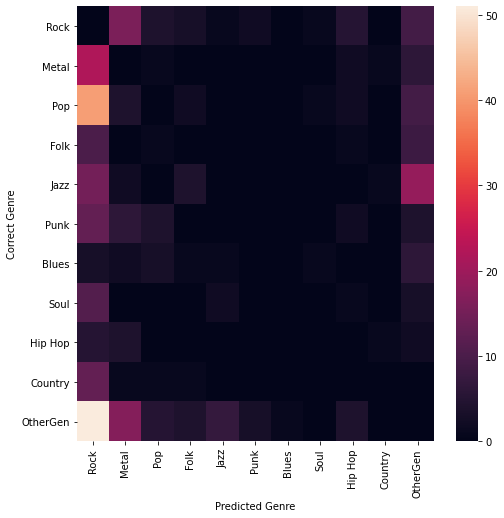

In [457]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre");

One of the problems is that `OtherGen` encompasses all other genres, and because of that it has a large variation of encompassing music descriptors, so any one item that isn't that similar to the "typical" item in their respective genre, is likely to be classified as "OtherGen"

When we consider the second highest probability score (that isn't OtherGen) we can increase our classification score from 51% to 57%, still not that high, but considerably higher

We can see that it appears most missclassfication occurs between less popular genres that as guessed as Rock (or OtherGen)

#### KNN Classifier - Multi Label Label

In [242]:
for k in [3, 5, 10, 15, 20, 30, 50, 75]:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(xb_train, yb_train)
    print ("k = " + str(k) + "   , score = ", str(classifier.score(xb_test, yb_test)))

k = 3   , score =  0.28717366628830876
k = 5   , score =  0.2905788876276958
k = 10   , score =  0.2724177071509648
k = 15   , score =  0.2996594778660613
k = 20   , score =  0.2814982973893303
k = 30   , score =  0.2849035187287174
k = 50   , score =  0.27128263337116915
k = 75   , score =  0.25312145289443816


In [243]:
k = 15
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(xb_train, yb_train);


In [319]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [320]:
# Creates a DataFrame w/ Correct and predicted classes
predicted = pd.DataFrame(classifier.predict(xb_test), columns=predict_dict.values())
predicted_prob = pd.DataFrame(np.transpose(np.array([[item[1] for item in classifier.predict_proba(xb_test)[i][:]] for i in range(11)])),
 columns = [gen + "_prob" for gen in main_genres])
test_y = pd.concat([test_y , predicted, predicted_prob], axis = 1)


test_y = test_y[["Rock", "Rock_p", "Rock_prob",
"Metal", "Metal_p", "Metal_prob",
"Pop", "Pop_p", "Pop_prob",
"Folk", "Folk_p", "Folk_prob",
"Jazz", "Jazz_p", "Jazz_prob",
"Punk", "Punk_p", "Punk_prob",
"Blues", "Blues_p", "Blues_prob",
"Soul", "Soul_p", "Soul_prob",
"Hip Hop", "Hip Hop_p", "Hip Hop_prob",
"Country", "Country_p", "Country_prob",
"OtherGen", "OtherGen_p", "OtherGen_prob"]]

In [327]:
test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rock           881 non-null    int64  
 1   Rock_p         881 non-null    int64  
 2   Rock_prob      881 non-null    float64
 3   Metal          881 non-null    int64  
 4   Metal_p        881 non-null    int64  
 5   Metal_prob     881 non-null    float64
 6   Pop            881 non-null    int64  
 7   Pop_p          881 non-null    int64  
 8   Pop_prob       881 non-null    float64
 9   Folk           881 non-null    int64  
 10  Folk_p         881 non-null    int64  
 11  Folk_prob      881 non-null    float64
 12  Jazz           881 non-null    int64  
 13  Jazz_p         881 non-null    int64  
 14  Jazz_prob      881 non-null    float64
 15  Punk           881 non-null    int64  
 16  Punk_p         881 non-null    int64  
 17  Punk_prob      881 non-null    float64
 18  Blues     

In [323]:
# we're getting a lot of instances that aren't beiong classified as anything, why????

In [341]:
predicted[predicted.sum(axis=1) > 1].sum()

Rock_p        3
Metal_p       0
Pop_p         2
Folk_p        0
Jazz_p        1
Punk_p        0
Blues_p       0
Soul_p        0
Hip Hop_p     0
Country_p     0
OtherGen_p    0
dtype: int64

In [342]:
predicted[predicted.sum(axis=1) == 1].sum()

Rock_p        244
Metal_p       116
Pop_p           3
Folk_p          9
Jazz_p         11
Punk_p          1
Blues_p         0
Soul_p          0
Hip Hop_p      50
Country_p       0
OtherGen_p    100
dtype: int64

#### Logistic Regression

In [345]:
from sklearn.linear_model import LogisticRegression

In [458]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [459]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [460]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [461]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = model.predict(x_test)
predicted = pd.DataFrame(model.predict_proba(x_test), columns=model.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Rock_p', 'Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'OtherGen', "OtherGen_p"]]

In [462]:
test_y

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
0        Rock  OtherGen       Metal     1  0.153042      0  0.243226    0   
1        Jazz  OtherGen        Jazz     0  0.081380      0  0.017973    0   
2     Hip Hop   Hip Hop     Hip Hop     0  0.108740      0  0.050455    0   
3        Rock      Rock        Rock     1  0.356421      0  0.244799    0   
4        Jazz  OtherGen        Rock     0  0.315909      0  0.020017    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
876     Metal     Metal       Metal     0  0.258065      1  0.549116    0   
877     Metal     Metal       Metal     0  0.320023      1  0.405248    0   
878  OtherGen  OtherGen        Rock     0  0.242448      0  0.005612    0   
879      Rock      Rock        Rock     1  0.596123      0  0.049586    0   
880     Metal     Metal       Metal     0  0.261815      1  0.392803    0   

        Pop_p  Folk  ...  Blues   Blues_p  Soul    Soul_p  Hip Hop  Hip Hop_p  \
0    0.100233     1  ...      0  0.001234     0  0.002016        0   0.020833   
1    0.011011     0  ...      0  0.002703     0  0.001740        0   0.000228   
2    0.045675     0  ...      0  0.008167     0  0.036728        1   0.524892   
3    0.093941     0  ...      0  0.002616     0  0.006351        0   0.021338   
4    0.068972     0  ...      0  0.021451     0  0.025884        0   0.012302   
..        ...   ...  ...    ...       ...   ...       ...      ...        ...   
876  0.024284     0  ...      0  0.000645     0  0.001441        0   0.004936   
877  0.041602     0  ...      0  0.001908     0  0.005411        0   0.022370   
878  0.056629     0  ...      0  0.057295     0  0.129954        0   0.021858   
879  0.041922     0  ...      1  0.010392     0  0.025047        0   0.004180   
880  0.064060     0  ...      0  0.002940     0  0.012737        0   0.073097   

     Country  Country_p  OtherGen  OtherGen_p  
0          0   0.012158         0    0.404304  
1          0   0.003606         0    0.654187  
2          0   0.011487         0    0.148713  
3          0   0.007552         0    0.206489  
4          0   0.008138         0    0.395916  
..       ...        ...       ...         ...  
876        0   0.001242         0    0.120818  
877        0   0.002735         0    0.116236  
878        0   0.022346         1    0.293916  
879        0   0.004243         0    0.153736  
880        0   0.007660         0    0.101115  

[881 rows x 25 columns]

In [463]:
# amount of correct guesses if 2nd Guess considered
test_y[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)]

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
1        Jazz  OtherGen        Jazz     0  0.081380      0  0.017973    0   
2     Hip Hop   Hip Hop     Hip Hop     0  0.108740      0  0.050455    0   
3        Rock      Rock        Rock     1  0.356421      0  0.244799    0   
7        Rock      Rock        Rock     1  0.307404      0  0.177933    0   
8        Rock      Rock        Rock     1  0.439837      0  0.120061    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
876     Metal     Metal       Metal     0  0.258065      1  0.549116    0   
877     Metal     Metal       Metal     0  0.320023      1  0.405248    0   
878  OtherGen  OtherGen        Rock     0  0.242448      0  0.005612    0   
879      Rock      Rock        Rock     1  0.596123      0  0.049586    0   
880     Metal     Metal       Metal     0  0.261815      1  0.392803    0   

        Pop_p  Folk  ...  Blues   Blues_p  Soul    Soul_p  Hip Hop  Hip Hop_p  \
1    0.011011     0  ...      0  0.002703     0  0.001740        0   0.000228   
2    0.045675     0  ...      0  0.008167     0  0.036728        1   0.524892   
3    0.093941     0  ...      0  0.002616     0  0.006351        0   0.021338   
7    0.156414     0  ...      0  0.002763     0  0.007857        0   0.044839   
8    0.066604     0  ...      0  0.008761     0  0.024584        0   0.013532   
..        ...   ...  ...    ...       ...   ...       ...      ...        ...   
876  0.024284     0  ...      0  0.000645     0  0.001441        0   0.004936   
877  0.041602     0  ...      0  0.001908     0  0.005411        0   0.022370   
878  0.056629     0  ...      0  0.057295     0  0.129954        0   0.021858   
879  0.041922     0  ...      1  0.010392     0  0.025047        0   0.004180   
880  0.064060     0  ...      0  0.002940     0  0.012737        0   0.073097   

     Country  Country_p  OtherGen  OtherGen_p  
1          0   0.003606         0    0.654187  
2          0   0.011487         0    0.148713  
3          0   0.007552         0    0.206489  
7          0   0.021768         0    0.211610  
8          0   0.009032         0    0.215931  
..       ...        ...       ...         ...  
876        0   0.001242         0    0.120818  
877        0   0.002735         0    0.116236  
878        0   0.022346         1    0.293916  
879        0   0.004243         0    0.153736  
880        0   0.007660         0    0.101115  

[502 rows x 25 columns]

In [464]:
model.score(x_test, y_test)

0.5005675368898979

In [465]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

502
0.5698070374574348


The Model doesn't really converge, even if we increase the number of iterations/params

We can assume that there is not enough distinct characteristics in the music descriptors to classify genres with higher precision than this

We can explore chat may be causing a such a high missclassification ration

Some of the ways we can do that are:
- Explore the influence of `Rock` and `OtherGen`
- Reduce the amount of genres it tries to differentiate
- ?

In [466]:
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [467]:
missclass

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
Rock         0     16    2     0     0     0      0     0        7        0   
Metal       27      0    0     0     0     0      0     0        2        0   
Pop         34      7    0     1     0     0      0     0        1        0   
Folk         7      0    0     0     0     0      0     0        4        0   
Jazz        17      2    0     0     0     0      0     0        0        0   
Punk        19      7    0     0     0     0      0     0        2        0   
Blues        8      2    0     0     0     0      0     0        0        0   
Soul        14      0    0     0     0     0      0     0        1        0   
Hip Hop      6      4    0     0     0     0      0     0        0        0   
Country     10      0    1     0     0     0      0     0        0        0   
OtherGen    60     18    0     0     2     0      0     0        8        0   

          OtherGen  
Rock            11  
Metal           10  
Pop             21  
Folk            11  
Jazz            14  
Punk             3  
Blues            8  
Soul             6  
Hip Hop          1  
Country          5  
OtherGen         0

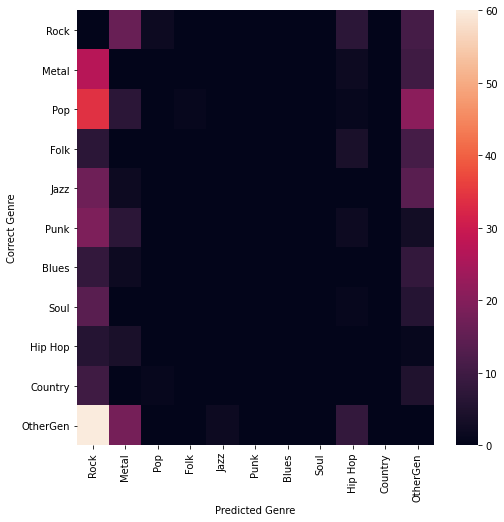

In [468]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre");

**Try w/ a SVM ?**

In [469]:
from sklearn.svm import SVC

In [508]:
classifier = SVC(kernel = 'rbf', C = 5, gamma = 2)
classifier.fit(x_train, y_train);

SVC(C=5, gamma=2)

In [509]:
classifier.score(x_test, y_test)

0.547105561861521

In [510]:
classifier = SVC(kernel = 'poly', degree = 3, C = 5)
classifier.fit(x_train, y_train);

SVC(C=5, kernel='poly')

In [511]:
classifier.score(x_test, y_test)

0.5391600454029511

In [512]:
classifier = SVC(kernel = 'rbf', C = 5, gamma = 2, probability=True)
classifier.fit(x_train, y_train);

In [514]:
classifier.predict_proba(x_test).shape

(881, 11)

In [515]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [516]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Rock_p', 'Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'OtherGen', "OtherGen_p"]]

In [517]:
# amount of correct guesses if 2nd Guess considered
test_y[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)]

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
0        Rock  OtherGen        Rock     1  0.128743      0  0.063081    0   
2     Hip Hop   Hip Hop     Hip Hop     0  0.047723      0  0.037774    0   
3        Rock      Rock        Rock     1  0.511425      0  0.097626    0   
7        Rock      Rock        Rock     1  0.565501      0  0.026326    0   
8        Rock      Rock        Rock     1  0.503902      0  0.063114    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
876     Metal     Metal       Metal     0  0.128613      1  0.710308    0   
877     Metal     Metal       Metal     0  0.122335      1  0.648090    0   
878  OtherGen  OtherGen        Rock     0  0.150444      0  0.003984    0   
879      Rock      Rock        Rock     1  0.628962      0  0.016294    0   
880     Metal     Metal       Metal     0  0.238479      1  0.444578    0   

        Pop_p  Folk  ...  Blues   Blues_p  Soul    Soul_p  Hip Hop  Hip Hop_p  \
0    0.042134     1  ...      0  0.006734     0  0.005616        0   0.022184   
2    0.015673     0  ...      0  0.006930     0  0.011219        1   0.677740   
3    0.137349     0  ...      0  0.002835     0  0.004627        0   0.009262   
7    0.180815     0  ...      0  0.004472     0  0.006451        0   0.027459   
8    0.069237     0  ...      0  0.005703     0  0.024220        0   0.003966   
..        ...   ...  ...    ...       ...   ...       ...      ...        ...   
876  0.022312     0  ...      0  0.002297     0  0.003025        0   0.001847   
877  0.041136     0  ...      0  0.003882     0  0.002467        0   0.003195   
878  0.034592     0  ...      0  0.044050     0  0.056576        0   0.002195   
879  0.073870     0  ...      1  0.014056     0  0.045758        0   0.001792   
880  0.041893     0  ...      0  0.006537     0  0.005434        0   0.031464   

     Country  Country_p  OtherGen  OtherGen_p  
0          0   0.010638         0    0.542725  
2          0   0.009495         0    0.162221  
3          0   0.010727         0    0.161702  
7          0   0.018444         0    0.108918  
8          0   0.010165         0    0.163131  
..       ...        ...       ...         ...  
876        0   0.002945         0    0.086265  
877        0   0.008262         0    0.094972  
878        0   0.008586         1    0.594905  
879        0   0.010764         0    0.069852  
880        0   0.016720         0    0.121425  

[541 rows x 25 columns]

In [518]:
print ("score = ", str(classifier.score(x_test, y_test)))

score =  0.547105561861521


In [519]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

541
0.6140749148694665


In [520]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

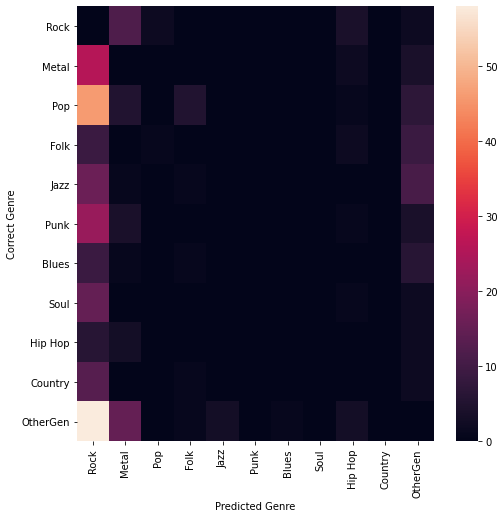

In [522]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre");

### Use NLP to get `genre` (or rating) from `descs` 

Naive Bayes Classifier (?)

In [148]:
# from sklearn import CountVectorizer 

# vectorizer = CountVectorizer()
 
# vectorizer.fit(["Training review one", "Second review"])

# counts = vectorizer.transform(["one review two review"])

In [149]:
# from reviews import counter, training_counts
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
 
# review = "This crib was amazing"
# review_counts = counter.transform([review])
 
# classifier = MultinomialNB()
 
# training_labels = [0]*1000 + [1]*1000
# classifier.fit(training_counts, training_labels)
 
# print(classifier.predict(review_counts))
# print(classifier.predict_proba(review_counts))

In [150]:
# from sklearn.metrics import accuracy_score
# accuracy_score(test_labels, predictions)

# from sklearn.metrics import confusion_matrix
# confusion_matrix(test_labels, predictions)


In [529]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [540]:
x = dfs_ml["descs"][dfs_ml.descs.isna() == False].values
y = dfs_ml.main_gen[dfs_ml.descs.isna() == False].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [530]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test);

In [545]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train);

MultinomialNB()

In [561]:
test_y = pd.DataFrame(y_test).rename(columns = { 0 : "main_gen"})

In [562]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Rock_p', 'Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)



In [563]:
test_y

main_gen y_predict   Blues_p     Country_p    Folk_p  Hip Hop_p  \
0        Rock      Rock  0.219821  6.233213e-05  0.000188   0.000011   
1         Pop      Rock  0.000008  3.585477e-07  0.000004   0.000051   
2    OtherGen  OtherGen  0.000060  1.041244e-04  0.000463   0.000009   
3        Rock       Pop  0.000539  1.038257e-03  0.000041   0.000002   
4    OtherGen      Folk  0.003335  4.355894e-02  0.832694   0.000008   
..        ...       ...       ...           ...       ...        ...   
856      Rock      Jazz  0.000088  4.238139e-07  0.000006   0.000009   
857      Rock      Rock  0.010297  3.033988e-02  0.073724   0.019127   
858      Punk      Punk  0.000042  4.043829e-07  0.000054   0.000329   
859      Rock       Pop  0.000020  4.178582e-03  0.021469   0.000015   
860      Rock      Rock  0.000273  5.613227e-04  0.000024   0.000085   

       Jazz_p       Metal_p  OtherGen_p         Pop_p        Punk_p    Rock_p  \
0    0.000043  1.202371e-04    0.001208  4.709176e-02  1.058043e-03  0.704526   
1    0.000109  1.561674e-06    0.009347  3.160023e-01  1.084827e-02  0.663419   
2    0.000872  3.924313e-03    0.992787  9.835153e-09  3.825026e-04  0.001398   
3    0.000059  3.171162e-06    0.003075  4.968481e-01  4.136814e-04  0.405961   
4    0.000294  1.192112e-03    0.047326  2.570116e-02  7.009409e-04  0.044526   
..        ...           ...         ...           ...           ...       ...   
856  0.851746  1.160908e-05    0.139604  4.430249e-06  3.401895e-07  0.008484   
857  0.039670  1.191812e-01    0.242993  1.069814e-01  2.272787e-02  0.324889   
858  0.000710  3.314961e-04    0.024818  2.997000e-07  9.464931e-01  0.027223   
859  0.000069  2.068828e-09    0.004679  9.530341e-01  2.622175e-08  0.016026   
860  0.000002  5.633914e-07    0.003960  3.690469e-01  6.131462e-02  0.564204   

           Soul_p alt_predict  
0    2.587067e-02        Rock  
1    2.078536e-04        Rock  
2    3.085652e-09       Metal  
3    9.201936e-02         Pop  
4    6.643715e-04        Folk  
..            ...         ...  
856  4.602342e-05        Jazz  
857  1.006946e-02        Rock  
858  2.066074e-07        Punk  
859  5.095119e-04         Pop  
860  5.282494e-04        Rock  

[861 rows x 14 columns]

In [567]:
print ("score = ", str(classifier.score(x_test, y_test)))

score =  0.578397212543554


In [568]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

521
0.6051103368176539


In [564]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

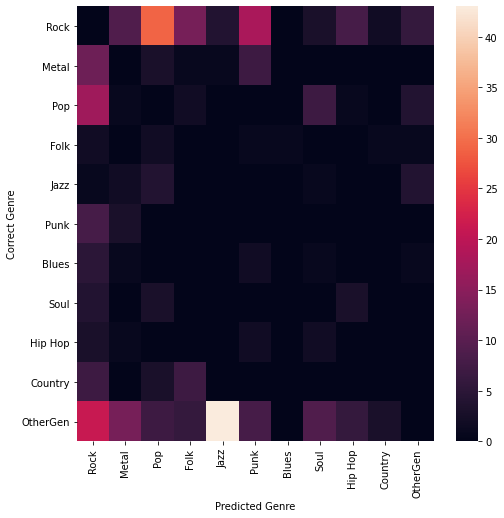

In [566]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre");